In [1]:
#load packages

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob
import cartopy
import cartopy.crs as ccrs

/home/b/b309162/.conda/envs/lightning_gpu_V_pytorch/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# timeseries - time step of \overline{ANN}-CESM
DS2 = {}

kexp='NOCLDTEND'
for k in range(2):

    fpath = f'../SPCESM_data/Fronterra_runs/Cheyenne_runs/ENS_lin_boost_6_whole_year/'
    fname = f'CESM2_ANNs_ncpl-48_spcam-dt-20_2013-02-01_partial-coupling-NOCLDTEND_ens_lin_ANN_06_boost_whole_year.cam.h{k+2}.2013-0[2-6]-*-*000.nc'
    flist = glob.glob(fpath+fname)
    DS2[k] = xr.open_mfdataset(flist, decode_times=False)
exit

In [3]:
# timeseries - time step of ANN-ens-CESM
DS2_stoch = {}

for k in range(2):

    fpath = f'../SPCESM_data/Fronterra_runs/Cheyenne_runs/stoch_ENS_lin_boost_6_whole_year/'
    fname = f'CESM2_ANNs_lin_ncpl-48_spcam-dt-20_2013-02-01_partial-coupling-NOCLDTEND_ANN_6_boost_sENS_5_whole_year.cam.h{k+2}.2013-0[2-6]-*-*000.nc'
    flist = glob.glob(fpath+fname)
    DS2_stoch[k] = xr.open_mfdataset(flist, decode_times=False)


In [4]:
# timeseries - time step of SP-CESM
DS3 = {}

for k in range(2):
    fpath = f'/work/bd1179/from_Mistral/bd1179/b381624/'
    fname = f'CESM2_NN2_pelayout01_ens_07.cam.h1.2013-0[2-6]-*-*000.nc' 
    flist = glob.glob(fpath+fname)
    DS3[k] = xr.open_mfdataset(flist, decode_times=False)


In [5]:
# timeseries - time step of ZM-CESM
DS_ctr_cam = {}

for k in range(1):
    fpath = f'../SPCESM_data/Fronterra_runs/Cheyenne_runs/CAM_ctr_whole_year/'
    fname = f'CESM2_2013-02-01_ctrl-CAM.cam.h1.2013-0[2-6]-*-*000.nc' 
    flist = glob.glob(fpath+fname)
    DS_ctr_cam[k] = xr.open_mfdataset(flist, decode_times=False)


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import matplotlib.image as imag

In [3]:

test_xr=xr.open_dataset('/work/bd1179/from_Mistral/bd1179/b381624/CESM2_NN2_pelayout01_ens_07.cam.h1.2013-01-01-00000.nc')
hybi=test_xr.hybi
hyai=test_xr.hyai


PS = 1e5; P0 = 1e5;
P = P0*hyai+PS*hybi; # Total pressure [Pa]
dP = P[1:]-P[:-1];

In [8]:
DS_ctr_cam[0]

<xarray.Dataset>
Dimensions:       (lat: 96, lon: 144, time: 1500, lev: 26, ilev: 27, nbnd: 2)
Coordinates:
  * lat           (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon           (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lev           (lev) float64 3.545 7.389 13.97 23.94 ... 929.6 970.6 992.6
  * ilev          (ilev) float64 2.194 4.895 9.882 18.05 ... 956.0 985.1 1e+03
  * time          (time) float64 0.0 0.1042 0.2083 0.3125 ... 149.7 149.8 149.9
Dimensions without coordinates: nbnd
Data variables: (12/42)
    gw            (time, lat) float64 dask.array<chunksize=(1, 96), meta=np.ndarray>
    hyam          (time, lev) float64 dask.array<chunksize=(1, 26), meta=np.ndarray>
    hybm          (time, lev) float64 dask.array<chunksize=(1, 26), meta=np.ndarray>
    P0            (time) float64 1e+05 1e+05 1e+05 1e+05 ... 1e+05 1e+05 1e+05
    hyai          (time, ilev) float64 dask.array<chunksize=(1, 27), meta=np.ndarray>
    hybi          (time, ilev) float64 dask.array<chunksize=(1, 27), meta=np.ndarray>
    ...            ...
    SOLIN         (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    SOLL          (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    SOLLD         (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    SOLS          (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    SOLSD         (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    T             (time, lev, lat, lon) float32 dask.array<chunksize=(1, 26, 96, 144), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              CESM2_2013-02-01_ctrl-CAM
    logname:           sungduk
    host:              cheyenne2
    initial_file:      CESM2_ncpl-48_spcam-dt-20_sp-baseline.cam.i.2013-02-01...
    topography_file:   /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/fv_1.9x2...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  minute_30

In [4]:
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import math

import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


In [5]:
fz = 24
lw = 4
siz = 100

plt.rc('text', usetex=False)
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif', size=fz)
mpl.rcParams['lines.linewidth'] = lw


In [11]:
vmin0 = 0.0
vmax0 = 0.8

In [12]:
vmin0_long = 0.0
vmax0_long = 0.5

In [6]:
lat=np.arange(-90,90,180/96)
lon=np.arange(0,360,360/144)

In [7]:
from cbrain.data_generator import DataGenerator
#load vertical axis in pressure coords 
test_xr=xr.open_dataset('/work/bd1179/from_Mistral/bd1179/b381624/CESM2_NN2_pelayout01_ens_07.cam.h1.2013-01-01-00000.nc')
hybi=test_xr.hybi
hyai=test_xr.hyai


PS = 1e5; P0 = 1e5;
P = P0*hyai+PS*hybi; # Total pressure [Pa]
dP = P[1:]-P[:-1];

2024-09-05 14:48:07.676684: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
DS_ctr_cam[0]

<xarray.Dataset>
Dimensions:       (lat: 96, lon: 144, time: 1500, lev: 26, ilev: 27, nbnd: 2)
Coordinates:
  * lat           (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon           (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lev           (lev) float64 3.545 7.389 13.97 23.94 ... 929.6 970.6 992.6
  * ilev          (ilev) float64 2.194 4.895 9.882 18.05 ... 956.0 985.1 1e+03
  * time          (time) float64 0.0 0.1042 0.2083 0.3125 ... 149.7 149.8 149.9
Dimensions without coordinates: nbnd
Data variables: (12/42)
    gw            (time, lat) float64 dask.array<chunksize=(1, 96), meta=np.ndarray>
    hyam          (time, lev) float64 dask.array<chunksize=(1, 26), meta=np.ndarray>
    hybm          (time, lev) float64 dask.array<chunksize=(1, 26), meta=np.ndarray>
    P0            (time) float64 1e+05 1e+05 1e+05 1e+05 ... 1e+05 1e+05 1e+05
    hyai          (time, ilev) float64 dask.array<chunksize=(1, 27), meta=np.ndarray>
    hybi          (time, ilev) float64 dask.array<chunksize=(1, 27), meta=np.ndarray>
    ...            ...
    SOLIN         (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    SOLL          (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    SOLLD         (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    SOLS          (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    SOLSD         (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    T             (time, lev, lat, lon) float32 dask.array<chunksize=(1, 26, 96, 144), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              CESM2_2013-02-01_ctrl-CAM
    logname:           sungduk
    host:              cheyenne2
    initial_file:      CESM2_ncpl-48_spcam-dt-20_sp-baseline.cam.i.2013-02-01...
    topography_file:   /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/fv_1.9x2...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  minute_30

In [16]:
#compute zonal mean of average temperature before coupling TBC of SP-CESM
SPCESM_T_zonal=DS3[1]['TBC'].mean('time').mean('lon').values

In [17]:
#load basemap for ocean vs. land split
from mpl_toolkits.basemap import maskoceans
from mpl_toolkits.basemap import Basemap

map = Basemap(projection='sinu', 
              lat_0=0, lon_0=0)

In [18]:
lat=np.arange(-90,90,180/96)
lon=np.arange(0,360,360/144)

In [19]:
SPCESM_T_mean=DS3[1]['TBC'].mean('time').values

In [20]:
SPCESM_T_mean

array([[[212.77672, 212.7767 , 212.7767 , ..., 212.77673, 212.77673,
         212.77673],
        [212.17389, 212.19513, 212.21729, ..., 212.11505, 212.13394,
         212.15346],
        [211.86307, 211.89182, 211.92236, ..., 211.78596, 211.80925,
         211.83499],
        ...,
        [231.21794, 231.2262 , 231.2349 , ..., 231.19562, 231.20271,
         231.21016],
        [231.40315, 231.40651, 231.40987, ..., 231.39156, 231.39575,
         231.39961],
        [231.49435, 231.49435, 231.49435, ..., 231.49435, 231.49437,
         231.49435]],

       [[205.59113, 205.59113, 205.59113, ..., 205.59113, 205.59113,
         205.59113],
        [205.18916, 205.2079 , 205.22774, ..., 205.13863, 205.15443,
         205.17139],
        [204.94696, 204.98215, 205.01976, ..., 204.85754, 204.88481,
         204.91476],
        ...,
        [224.53328, 224.52985, 224.52872, ..., 224.55753, 224.54732,
         224.53914],
        [224.99425, 224.99057, 224.98769, ..., 225.0093 , 225.0037 ,
   

In [21]:
# shift data 
Lons,Lats = np.meshgrid(lon,lat)
lons_2, data_shift = map.shiftdata(Lons, datain = np.reshape(SPCESM_T_mean[24,:,:],
                                                             (lat.size,lon.size)) 
                                                             , lon_0=0)

In [22]:
# mask ocean area
MaskedArray_2 = maskoceans(lons_2,Lats,np.reshape(SPCESM_T_mean[24,:,:],
                                                             (lat.size,lon.size)),resolution='f',grid=1.25,inlands=False)


In [23]:
# split between ocean and land grid cells 
ocean=np.where(np.reshape(MaskedArray_2.mask,(lat.size*lon.size))==True)[0]
land=np.where(np.reshape(MaskedArray_2.mask,(lat.size*lon.size))==False)[0]

In [24]:

def flag_ocean_land(input_array,ocean_land):
    """
    flag out ocean or land grid cells 
    for multiple time steps of hybrid simulations
    
    """
    input_array_copy=np.nan*np.zeros((input_array[:,1,1].size,int(lat.size*lon.size)))
    input_array_resh=np.reshape(input_array,(input_array[:,1,1].size,int(lat.size*lon.size)))
    input_array_copy[:,ocean_land.astype('int')]=input_array_resh[:,ocean_land.astype('int')]
    
    input_array_copy_resh=np.reshape(input_array_copy,(input_array.shape))
    
    return input_array_copy_resh

In [25]:
# get temperature field over ocean or land grid cells for SP-CESM

SPCESM_T_mean_ocean=flag_ocean_land(SPCESM_T_mean,ocean)
SPCESM_T_mean_land=flag_ocean_land(SPCESM_T_mean,land)


In [26]:
# get temperature field over ocean or land grid cells for /overline{DNN}-SP-CESM

ANN_T_mean=DS2[1]['T2'].mean('time').values

ANN_T_mean_ocean=flag_ocean_land(ANN_T_mean,ocean)
ANN_T_mean_land=flag_ocean_land(ANN_T_mean,land)


In [27]:
# get temperature field over ocean or land grid cells for DNN-ens-SP-CESM

ANN_ens_T_mean=DS2_stoch[1]['T2'].mean('time').values

ANN_ens_T_mean_ocean=flag_ocean_land(ANN_ens_T_mean,ocean)
ANN_ens_T_mean_land=flag_ocean_land(ANN_ens_T_mean,land)


In [28]:
# get temperature field over ocean or land grid cells ZM-CESM

ZM_CESM_T_mean=DS_ctr_cam[0]['T'].mean('time').values

ZM_CESM_T_mean_ocean=flag_ocean_land(ZM_CESM_T_mean,ocean)
ZM_CESM_T_mean_land=flag_ocean_land(ZM_CESM_T_mean,land)


In [29]:
#compute differences SP-CESM - \overline{DNN}-SP-CESM

SPCESM_ANN_diff_T_zonal=DS3[1]['TBC'].mean('time').mean('lon').values-DS2[1]['T2'].mean('time').mean('lon').values

In [30]:
#compute differences SP-CESM - DNN-ens-SP-CESM

SPCESM_ANN_ens_diff_T_zonal=DS3[1]['TBC'].mean('time').mean('lon').values-DS2_stoch[1]['T2'].mean('time').mean('lon').values

In [31]:
#compute differences SP-CESM - ZM-CESM

SPCESM_ZM_CESM_diff_T_zonal=DS3[1]['TBC'].mean('time').mean('lon').values-DS_ctr_cam[0]['T'].mean('time').mean('lon').values

In [32]:
DS3[1]['TBC']

,Array,Chunk
Bytes,3.21 GiB,21.94 MiB
Shape,"(2400, 26, 96, 144)","(16, 26, 96, 144)"
Count,450 Tasks,150 Chunks
Type,float32,numpy.ndarray


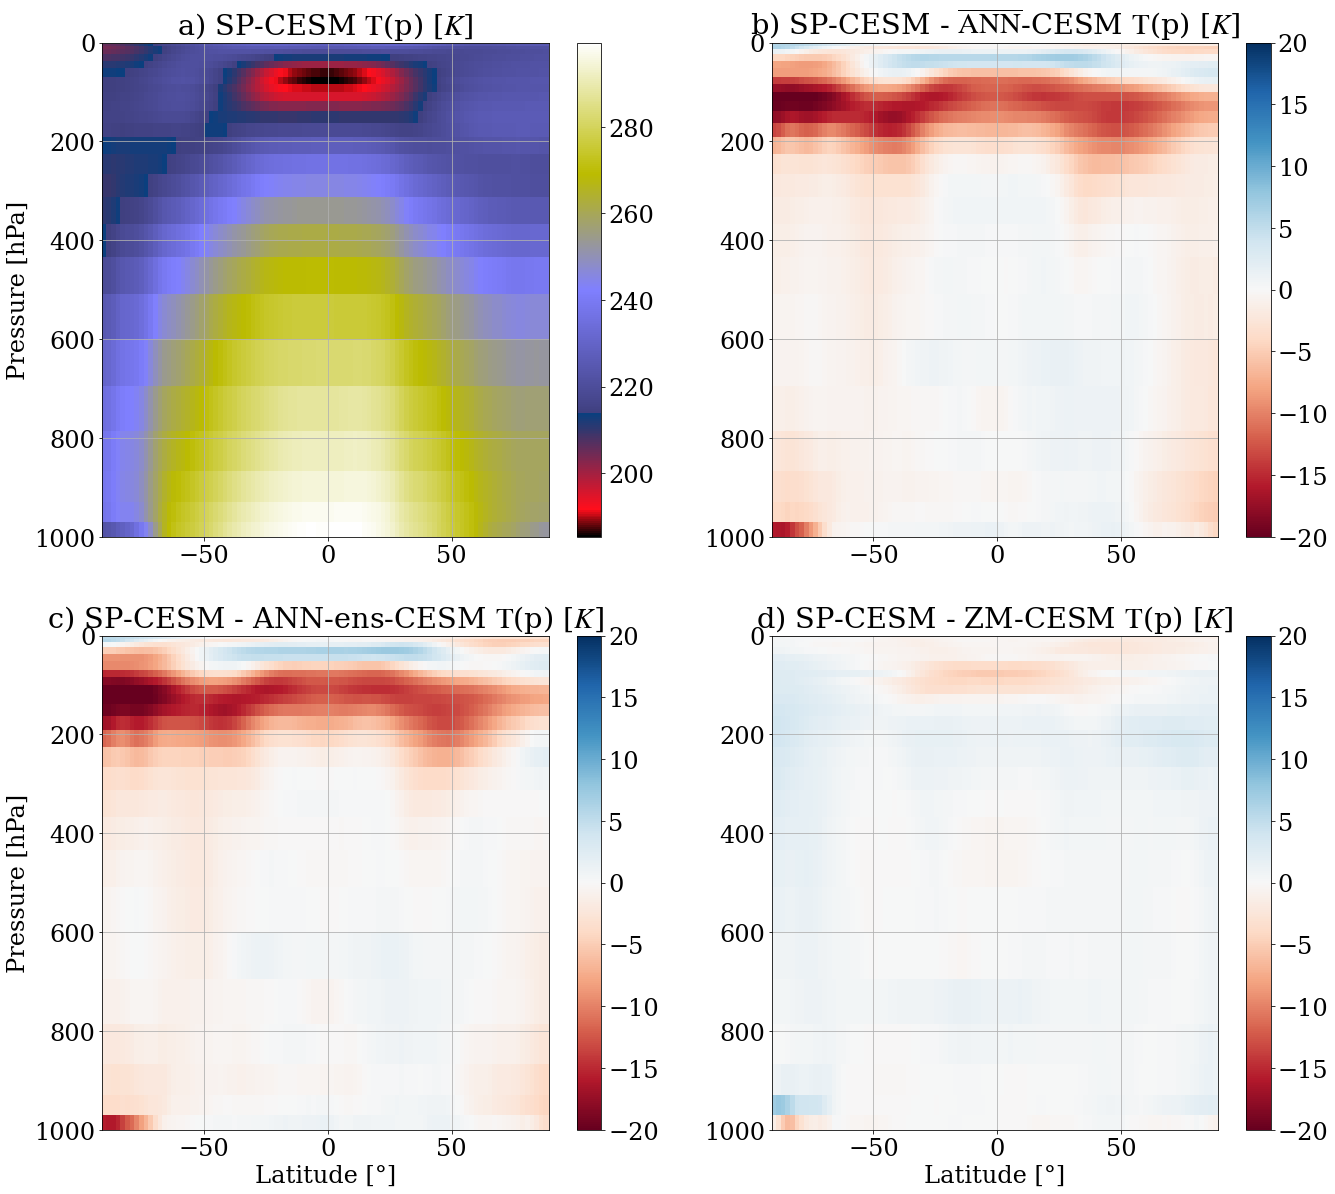

In [78]:
# plot zonal average temperatures and differences between the params 
plt.figure(2,(22,20))

plt.subplot(2,2,1)


plt.title(r'a) SP-CESM ${\mathrm{T}}$(p) [$K$]')
plt.pcolor(lat,P[0:26]/100,SPCESM_T_zonal,cmap='gist_stern')
plt.ylabel('Pressure [hPa]')

plt.colorbar()

sr=plt.gca()
plt.ylim(0,1000)
sr.invert_yaxis()
plt.grid(True)


plt.subplot(2,2,2)


plt.title(r'b) SP-CESM - $\overline{\mathrm{ANN}}$-CESM ${\mathrm{T}}$(p) [$K$]')
plt.pcolor(lat,P[0:26]/100,SPCESM_ANN_diff_T_zonal,cmap='RdBu',vmin=-20,vmax=+20)

plt.colorbar()

sr=plt.gca()
plt.ylim(0,1000)
sr.invert_yaxis()
plt.grid(True)


plt.subplot(2,2,3)


plt.title(r'c) SP-CESM - ANN-ens-CESM ${\mathrm{T}}$(p) [$K$]')
plt.pcolor(lat,P[0:26]/100,SPCESM_ANN_ens_diff_T_zonal,cmap='RdBu',vmin=-20,vmax=+20)
plt.xlabel('Latitude [°]')
plt.ylabel('Pressure [hPa]')

plt.colorbar()

sr=plt.gca()
plt.ylim(0,1000)
sr.invert_yaxis()
plt.grid(True)


plt.subplot(2,2,4)


plt.title(r'd) SP-CESM - ZM-CESM ${\mathrm{T}}$(p) [$K$]')
plt.pcolor(lat,P[0:26]/100,SPCESM_ZM_CESM_diff_T_zonal,cmap='RdBu',vmin=-20,vmax=+20)
plt.xlabel('Latitude [°]')

plt.colorbar()

sr=plt.gca()
plt.ylim(0,1000)
sr.invert_yaxis()
plt.grid(True)

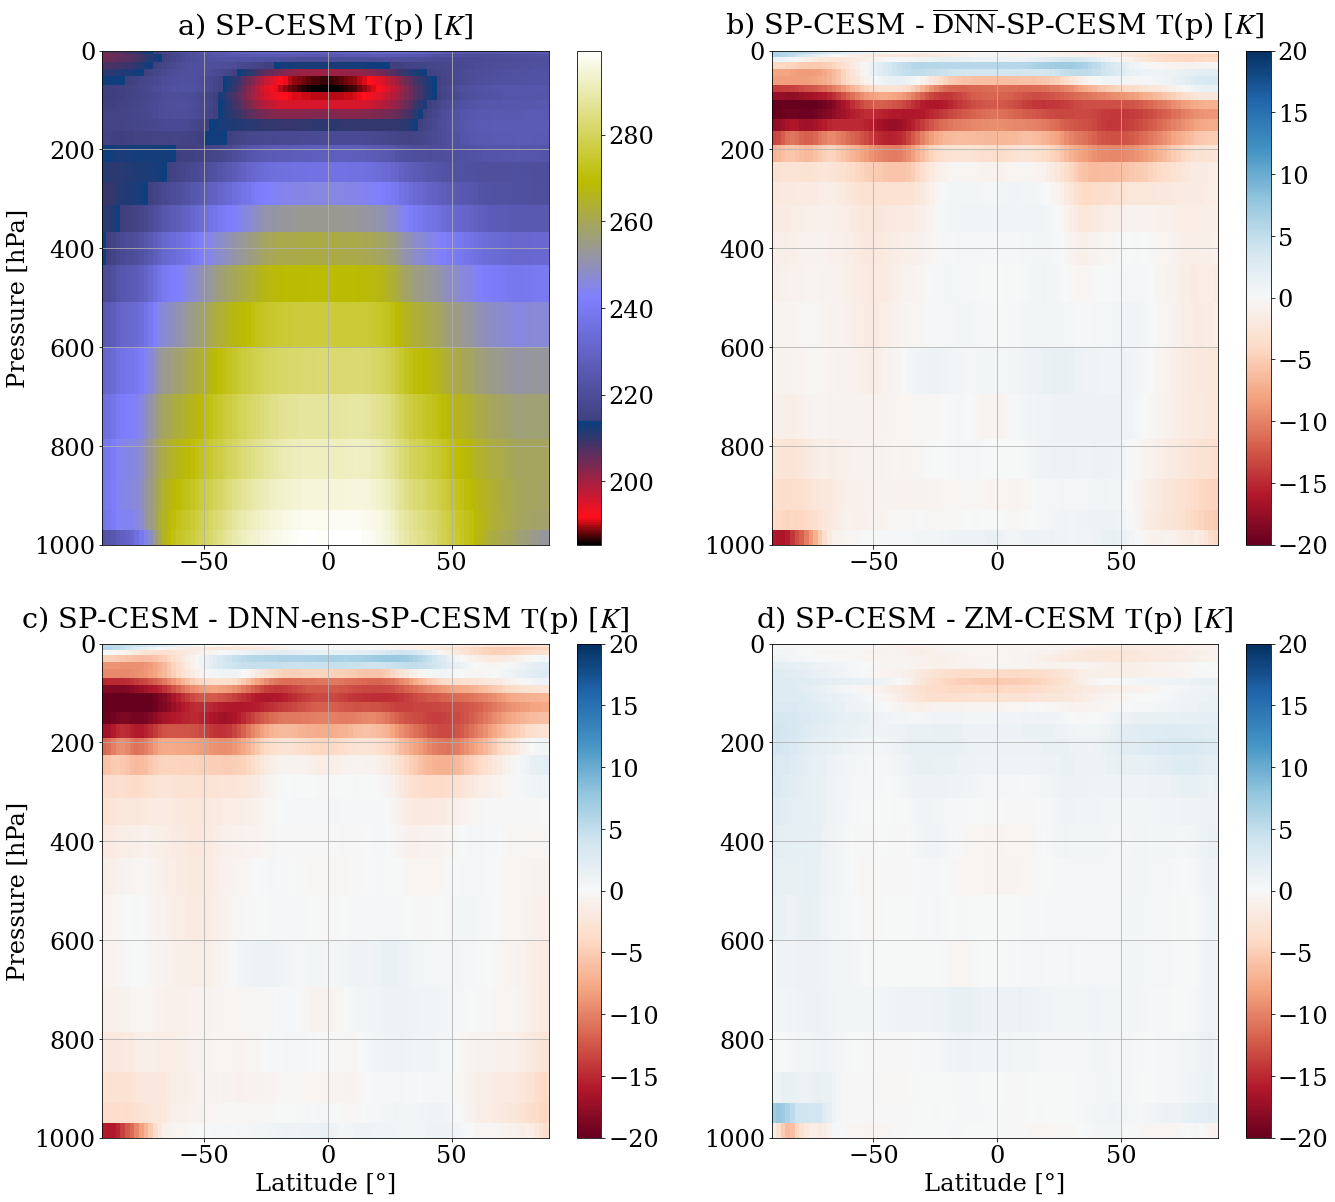

In [35]:
# plot zonal average temperatures and differences between the params 
plt.figure(2,(22,20))

plt.subplot(2,2,1)


plt.title(r'a) SP-CESM ${\mathrm{T}}$(p) [$K$]',y=1.02)
plt.pcolor(lat,P[0:26]/100,SPCESM_T_zonal,cmap='gist_stern')
plt.ylabel('Pressure [hPa]')

plt.colorbar()

sr=plt.gca()
plt.ylim(0,1000)
sr.invert_yaxis()
plt.grid(True)


plt.subplot(2,2,2)


plt.title(r'b) SP-CESM - $\overline{\mathrm{DNN}}$-SP-CESM ${\mathrm{T}}$(p) [$K$]',y=1.02)
plt.pcolor(lat,P[0:26]/100,SPCESM_ANN_diff_T_zonal,cmap='RdBu',vmin=-20,vmax=+20)

plt.colorbar()

sr=plt.gca()
plt.ylim(0,1000)
sr.invert_yaxis()
plt.grid(True)


plt.subplot(2,2,3)


plt.title(r'c) SP-CESM - DNN-ens-SP-CESM ${\mathrm{T}}$(p) [$K$]',y=1.02)
plt.pcolor(lat,P[0:26]/100,SPCESM_ANN_ens_diff_T_zonal,cmap='RdBu',vmin=-20,vmax=+20)
plt.xlabel('Latitude [°]')
plt.ylabel('Pressure [hPa]')

plt.colorbar()

sr=plt.gca()
plt.ylim(0,1000)
sr.invert_yaxis()
plt.grid(True)


plt.subplot(2,2,4)


plt.title(r'd) SP-CESM - ZM-CESM ${\mathrm{T}}$(p) [$K$]',y=1.02)
plt.pcolor(lat,P[0:26]/100,SPCESM_ZM_CESM_diff_T_zonal,cmap='RdBu',vmin=-20,vmax=+20)
plt.xlabel('Latitude [°]')

plt.colorbar()

sr=plt.gca()
plt.ylim(0,1000)
sr.invert_yaxis()
plt.grid(True)

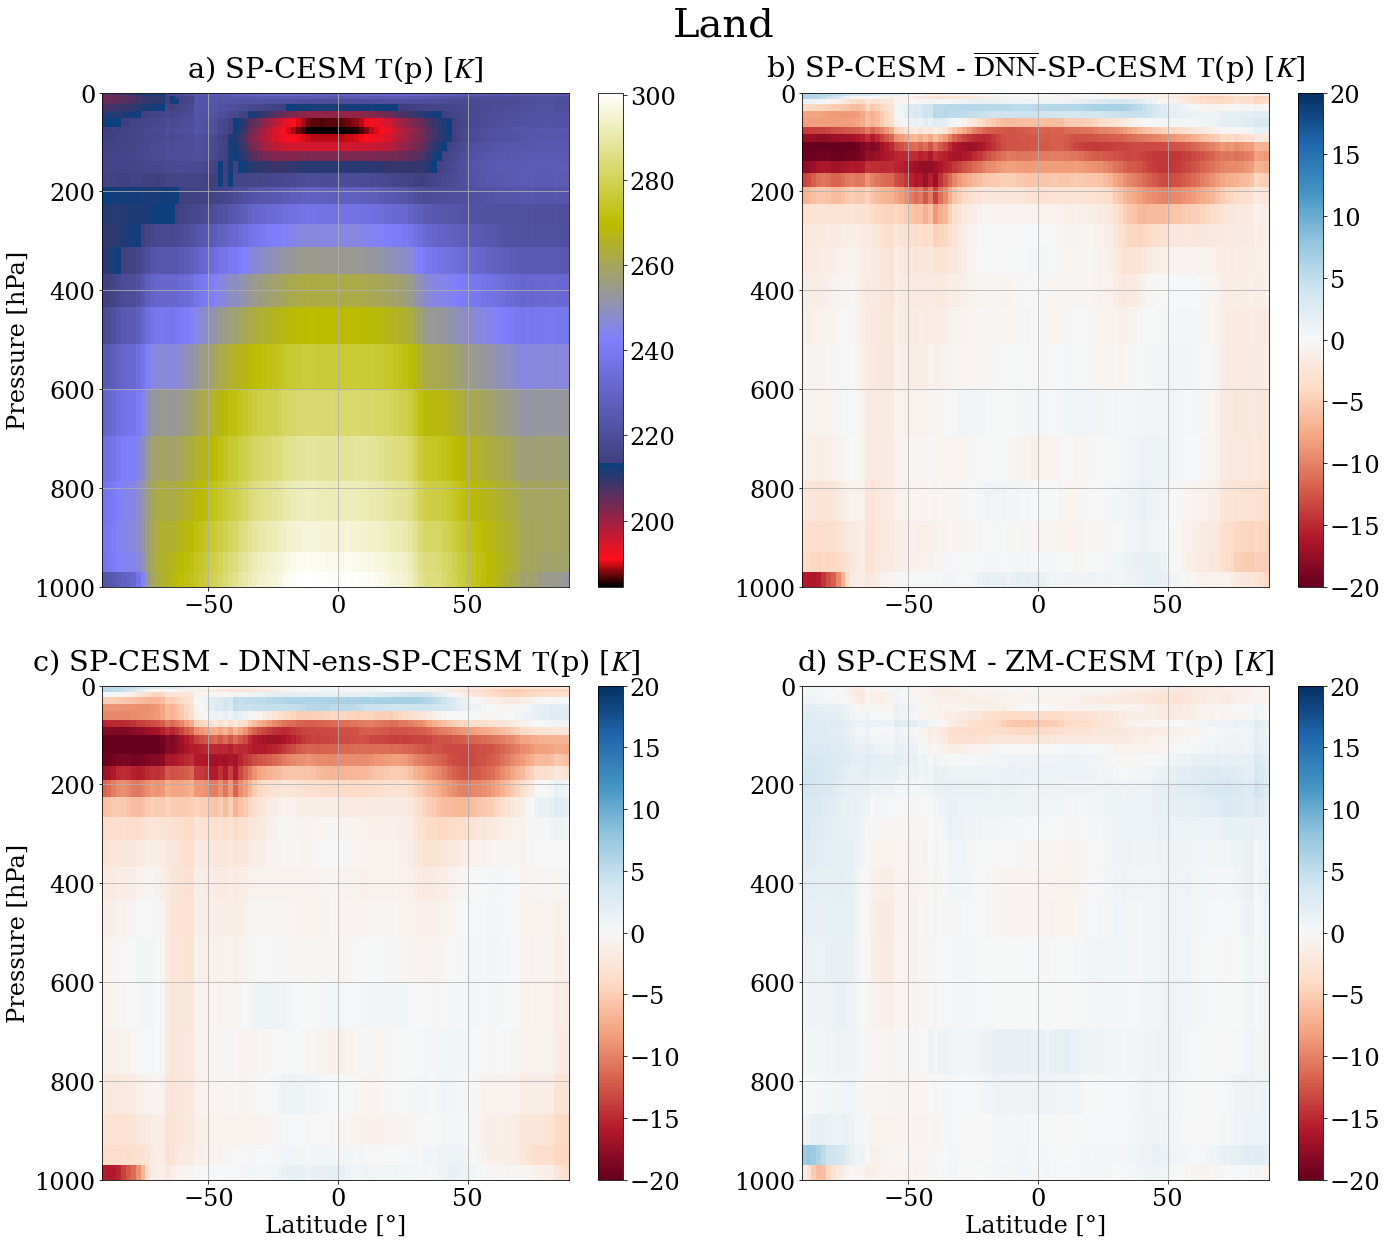

In [39]:
# plot zonal average temperatures and differences between the params Land
plt.figure(2,(23,20))


plt.suptitle('Land', fontsize=40, y=0.94)

plt.subplot(2,2,1)


plt.title(r'a) SP-CESM ${\mathrm{T}}$(p) [$K$]',y=1.02)
plt.pcolor(lat,P[0:26]/100,np.nanmean(SPCESM_T_mean_land,2),cmap='gist_stern')
plt.ylabel('Pressure [hPa]')

plt.colorbar()

sr=plt.gca()
plt.ylim(0,1000)
sr.invert_yaxis()
plt.grid(True)


plt.subplot(2,2,2)


plt.title(r'b) SP-CESM - $\overline{\mathrm{DNN}}$-SP-CESM ${\mathrm{T}}$(p) [$K$]',y=1.02)
plt.pcolor(lat,P[0:26]/100,np.nanmean(SPCESM_T_mean_land,2)-np.nanmean(ANN_T_mean_land,2),cmap='RdBu',vmin=-20,vmax=+20)

plt.colorbar()

sr=plt.gca()
plt.ylim(0,1000)
sr.invert_yaxis()
plt.grid(True)


plt.subplot(2,2,3)


plt.title(r'c) SP-CESM - DNN-ens-SP-CESM ${\mathrm{T}}$(p) [$K$]',y=1.02)
plt.pcolor(lat,P[0:26]/100,np.nanmean(SPCESM_T_mean_land,2)-np.nanmean(ANN_ens_T_mean_land,2),cmap='RdBu',vmin=-20,vmax=+20)
plt.xlabel('Latitude [°]')
plt.ylabel('Pressure [hPa]')

plt.colorbar()

sr=plt.gca()
plt.ylim(0,1000)
sr.invert_yaxis()
plt.grid(True)


plt.subplot(2,2,4)


plt.title(r'd) SP-CESM - ZM-CESM ${\mathrm{T}}$(p) [$K$]',y=1.02)
plt.pcolor(lat,P[0:26]/100,np.nanmean(SPCESM_T_mean_land,2)-np.nanmean(ZM_CESM_T_mean_land,2),cmap='RdBu',vmin=-20,vmax=+20)
plt.xlabel('Latitude [°]')

plt.colorbar()

sr=plt.gca()
plt.ylim(0,1000)
sr.invert_yaxis()
plt.grid(True)

/tmp/ipykernel_2643117/550827061.py:11: RuntimeWarning: Mean of empty slice
  plt.pcolor(lat,P[0:26]/100,np.nanmean(SPCESM_T_mean_ocean,2),cmap='gist_stern')
/tmp/ipykernel_2643117/550827061.py:26: RuntimeWarning: Mean of empty slice
  plt.pcolor(lat,P[0:26]/100,np.nanmean(SPCESM_T_mean_ocean,2)-np.nanmean(ANN_T_mean_ocean,2),cmap='RdBu',vmin=-20,vmax=+20)
/tmp/ipykernel_2643117/550827061.py:40: RuntimeWarning: Mean of empty slice
  plt.pcolor(lat,P[0:26]/100,np.nanmean(SPCESM_T_mean_ocean,2)-np.nanmean(ANN_ens_T_mean_ocean,2),cmap='RdBu',vmin=-20,vmax=+20)
/tmp/ipykernel_2643117/550827061.py:56: RuntimeWarning: Mean of empty slice
  plt.pcolor(lat,P[0:26]/100,np.nanmean(SPCESM_T_mean_ocean,2)-np.nanmean(ZM_CESM_T_mean_ocean,2),cmap='RdBu',vmin=-20,vmax=+20)


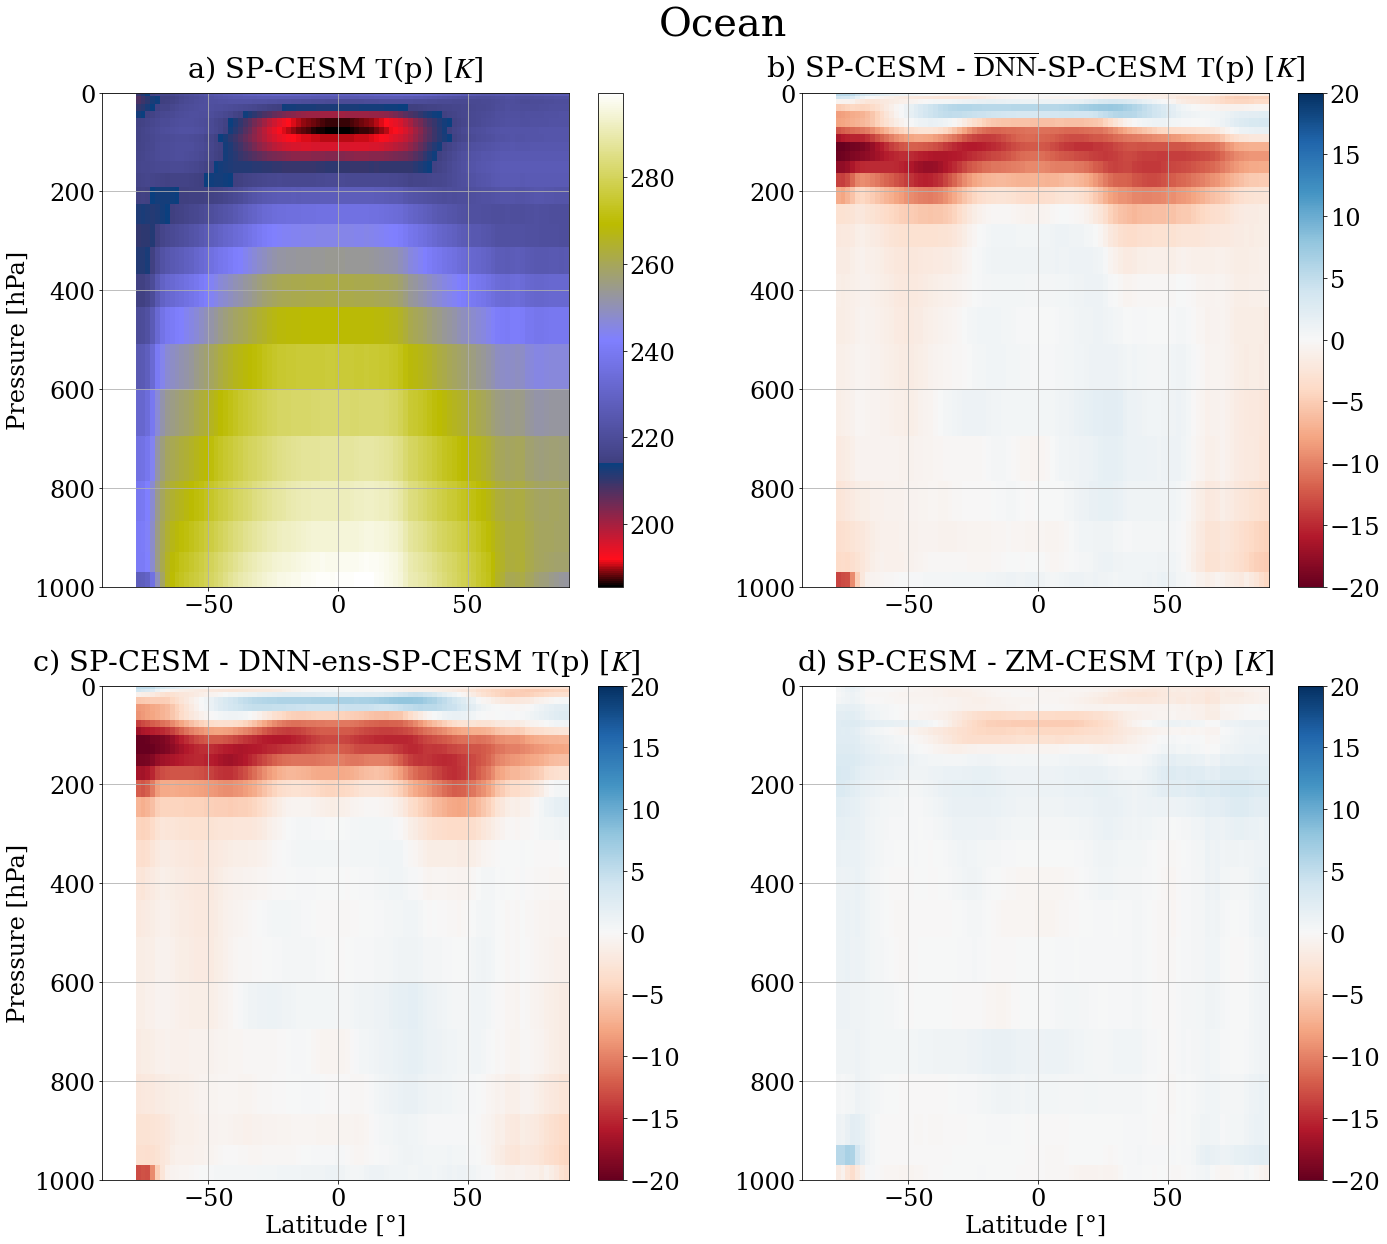

In [40]:
# plot zonal average temperatures and differences between the params Ocean
plt.figure(2,(23,20))


plt.suptitle('Ocean', fontsize=40, y=0.94)

plt.subplot(2,2,1)


plt.title(r'a) SP-CESM ${\mathrm{T}}$(p) [$K$]',y=1.02)
plt.pcolor(lat,P[0:26]/100,np.nanmean(SPCESM_T_mean_ocean,2),cmap='gist_stern')
plt.ylabel('Pressure [hPa]')

plt.colorbar()

sr=plt.gca()
plt.ylim(0,1000)
sr.invert_yaxis()
plt.grid(True)


plt.subplot(2,2,2)


plt.title(r'b) SP-CESM - $\overline{\mathrm{DNN}}$-SP-CESM ${\mathrm{T}}$(p) [$K$]',y=1.02)
plt.pcolor(lat,P[0:26]/100,np.nanmean(SPCESM_T_mean_ocean,2)-np.nanmean(ANN_T_mean_ocean,2),cmap='RdBu',vmin=-20,vmax=+20)

plt.colorbar()

sr=plt.gca()
plt.ylim(0,1000)
sr.invert_yaxis()
plt.grid(True)


plt.subplot(2,2,3)


plt.title(r'c) SP-CESM - DNN-ens-SP-CESM ${\mathrm{T}}$(p) [$K$]',y=1.02)
plt.pcolor(lat,P[0:26]/100,np.nanmean(SPCESM_T_mean_ocean,2)-np.nanmean(ANN_ens_T_mean_ocean,2),cmap='RdBu',vmin=-20,vmax=+20)
plt.xlabel('Latitude [°]')
plt.ylabel('Pressure [hPa]')

plt.colorbar()

sr=plt.gca()
plt.ylim(0,1000)
sr.invert_yaxis()
plt.grid(True)


plt.subplot(2,2,4)


plt.title(r'd) SP-CESM - ZM-CESM ${\mathrm{T}}$(p) [$K$]',y=1.02)
plt.pcolor(lat,P[0:26]/100,np.nanmean(SPCESM_T_mean_ocean,2)-np.nanmean(ZM_CESM_T_mean_ocean,2),cmap='RdBu',vmin=-20,vmax=+20)
plt.xlabel('Latitude [°]')

plt.colorbar()

sr=plt.gca()
plt.ylim(0,1000)
sr.invert_yaxis()
plt.grid(True)

In [41]:
# repeat for specific humidity before coupling
SPCESM_Q_zonal=DS3[1]['QBC'].mean('time').mean('lon').values*1000

In [42]:
SPCESM_ANN_diff_Q_zonal=(DS3[1]['QBC'].mean('time').mean('lon').values-DS2[1]['Q2'].mean('time').mean('lon').values)*1000

In [43]:
SPCESM_ANN_ens_diff_Q_zonal=(DS3[1]['QBC'].mean('time').mean('lon').values-DS2_stoch[1]['Q2'].mean('time').mean('lon').values)*1000

In [44]:
SPCESM_ZM_CESM_diff_Q_zonal=(DS3[1]['QBC'].mean('time').mean('lon').values-DS_ctr_cam[0]['Q'].mean('time').mean('lon').values)*1000

In [45]:
SPCESM_Q_mean=DS3[1]['QBC'].mean('time').values*1000

In [46]:
SPCESM_Q_mean_ocean=flag_ocean_land(SPCESM_Q_mean,ocean)
SPCESM_Q_mean_land=flag_ocean_land(SPCESM_Q_mean,land)


In [47]:
ANN_Q_mean=DS2[1]['Q2'].mean('time').values*1000

ANN_Q_mean_ocean=flag_ocean_land(ANN_Q_mean,ocean)
ANN_Q_mean_land=flag_ocean_land(ANN_Q_mean,land)


In [48]:
ANN_ens_Q_mean=DS2_stoch[1]['Q2'].mean('time').values*1000

ANN_ens_Q_mean_ocean=flag_ocean_land(ANN_ens_Q_mean,ocean)
ANN_ens_Q_mean_land=flag_ocean_land(ANN_ens_Q_mean,land)


In [49]:
ZM_CESM_Q_mean=DS_ctr_cam[0]['Q'].mean('time').values*1000

ZM_CESM_Q_mean_ocean=flag_ocean_land(ZM_CESM_Q_mean,ocean)
ZM_CESM_Q_mean_land=flag_ocean_land(ZM_CESM_Q_mean,land)


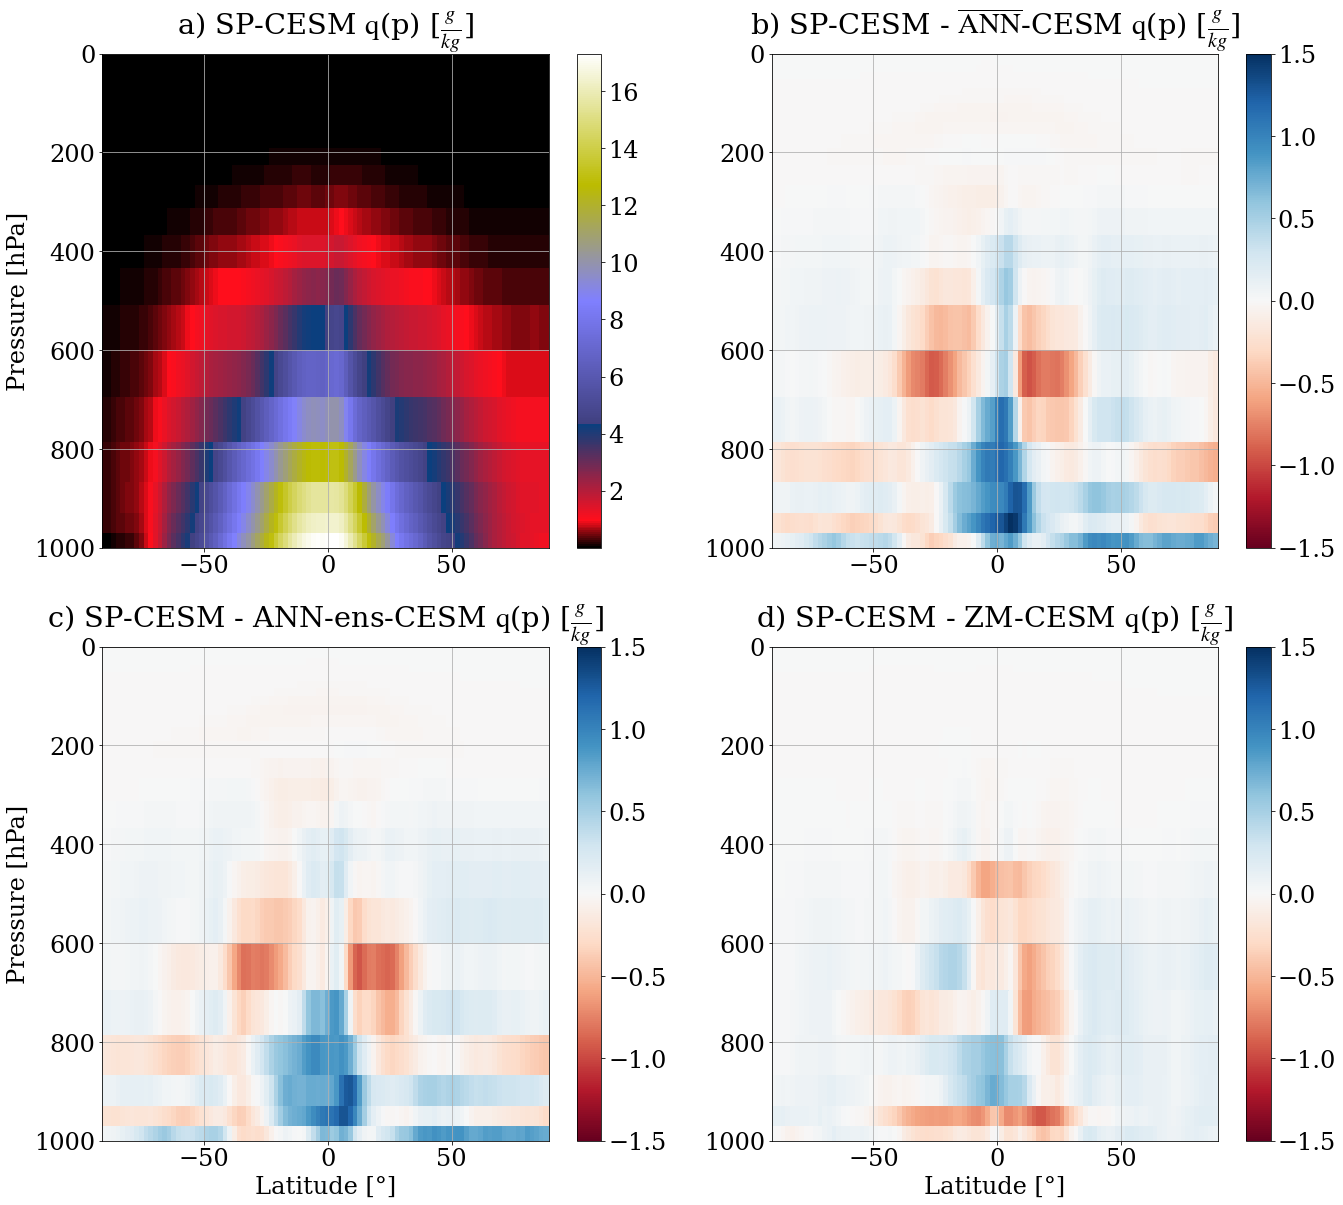

In [64]:
# plot zonal average specific humidity and differences between the params 

plt.figure(2,(22,20))

plt.subplot(2,2,1)


plt.title(r'a) SP-CESM ${\mathrm{q}}$(p) [$\frac{g}{kg}$]')
plt.pcolor(lat,P[0:26]/100,SPCESM_Q_zonal,cmap='gist_stern')
plt.ylabel('Pressure [hPa]')

plt.colorbar()

sr=plt.gca()
plt.ylim(0,1000)
sr.invert_yaxis()
plt.grid(True)


plt.subplot(2,2,2)


plt.title(r'b) SP-CESM - $\overline{\mathrm{ANN}}$-CESM ${\mathrm{q}}$(p) [$\frac{g}{kg}$]')
plt.pcolor(lat,P[0:26]/100,SPCESM_ANN_diff_Q_zonal,cmap='RdBu',vmin=-1.5,vmax=1.5)

plt.colorbar()

sr=plt.gca()
plt.ylim(0,1000)
sr.invert_yaxis()
plt.grid(True)


plt.subplot(2,2,3)


plt.title(r'c) SP-CESM - ANN-ens-CESM ${\mathrm{q}}$(p) [$\frac{g}{kg}$]')
plt.pcolor(lat,P[0:26]/100,SPCESM_ANN_ens_diff_Q_zonal,cmap='RdBu',vmin=-1.5,vmax=1.5)
plt.ylabel('Pressure [hPa]')
plt.xlabel('Latitude [°]')
plt.colorbar()

sr=plt.gca()
plt.ylim(0,1000)
sr.invert_yaxis()
plt.grid(True)


plt.subplot(2,2,4)


plt.title(r'd) SP-CESM - ZM-CESM ${\mathrm{q}}$(p) [$\frac{g}{kg}$]')
plt.pcolor(lat,P[0:26]/100,SPCESM_ZM_CESM_diff_Q_zonal,cmap='RdBu',vmin=-1.5,vmax=1.5)

plt.colorbar()
plt.xlabel('Latitude [°]')

sr=plt.gca()
plt.ylim(0,1000)
sr.invert_yaxis()
plt.grid(True)


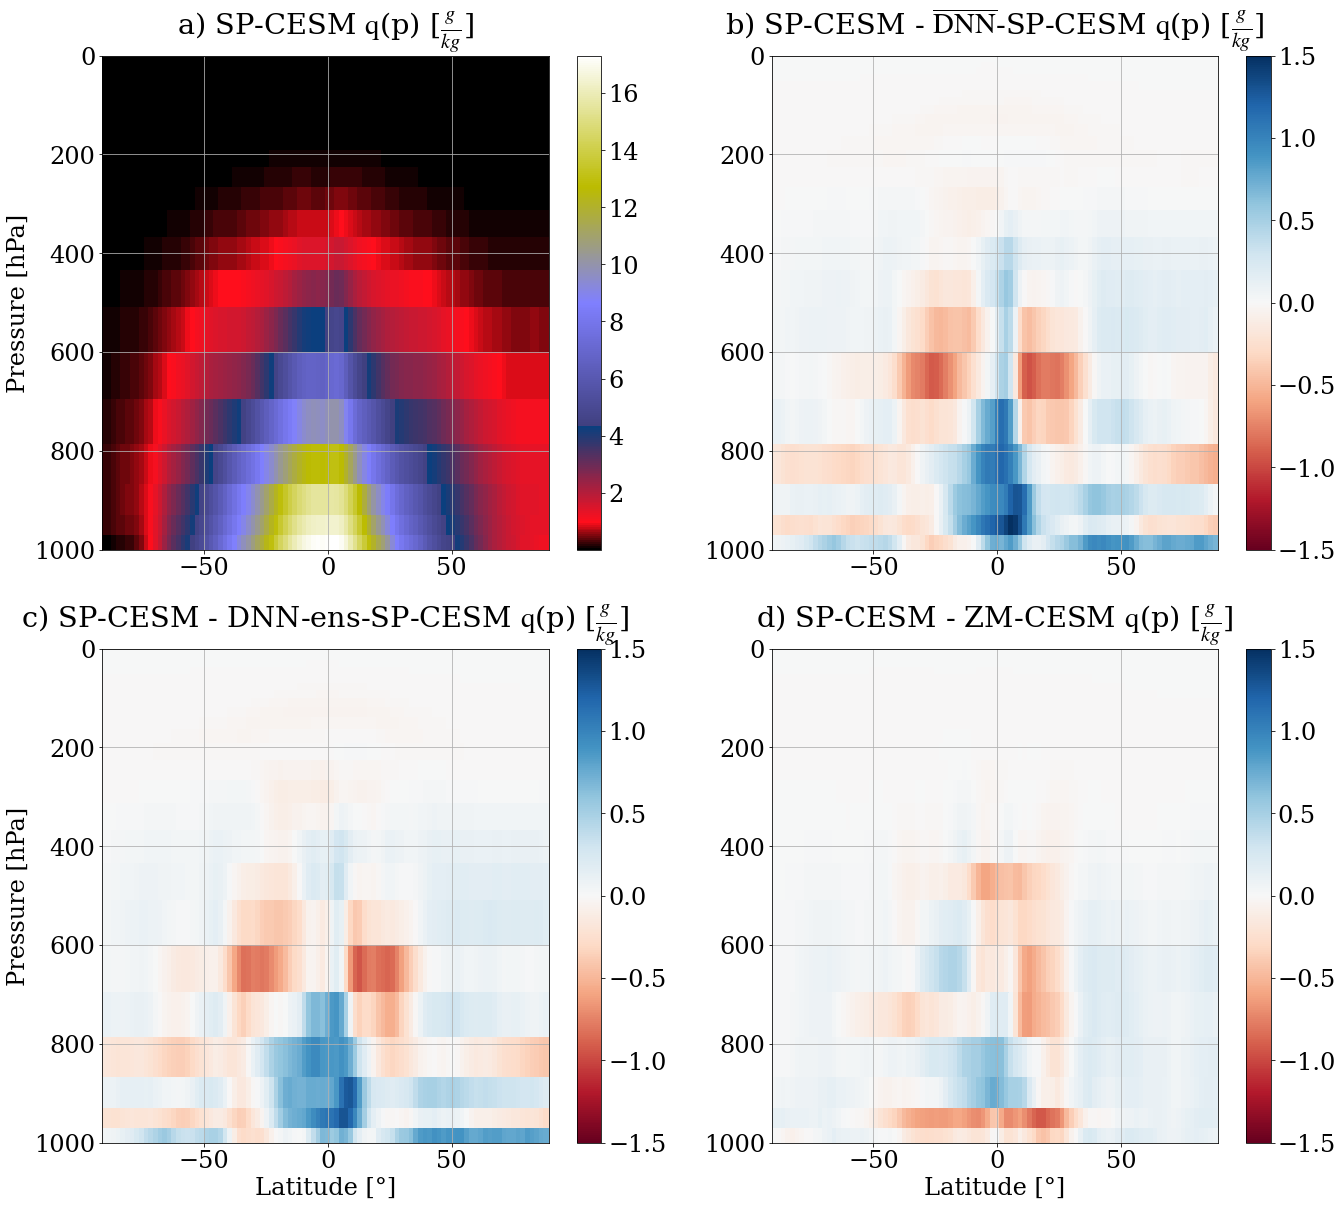

In [51]:
# plot zonal average specific humidity and differences between the params 

plt.figure(2,(22,20))

plt.subplot(2,2,1)


plt.title(r'a) SP-CESM ${\mathrm{q}}$(p) [$\frac{g}{kg}$]',y=1.03)
plt.pcolor(lat,P[0:26]/100,SPCESM_Q_zonal,cmap='gist_stern')
plt.ylabel('Pressure [hPa]')

plt.colorbar()

sr=plt.gca()
plt.ylim(0,1000)
sr.invert_yaxis()
plt.grid(True)


plt.subplot(2,2,2)


plt.title(r'b) SP-CESM - $\overline{\mathrm{DNN}}$-SP-CESM ${\mathrm{q}}$(p) [$\frac{g}{kg}$]',y=1.03)
plt.pcolor(lat,P[0:26]/100,SPCESM_ANN_diff_Q_zonal,cmap='RdBu',vmin=-1.5,vmax=1.5)

plt.colorbar()

sr=plt.gca()
plt.ylim(0,1000)
sr.invert_yaxis()
plt.grid(True)


plt.subplot(2,2,3)


plt.title(r'c) SP-CESM - DNN-ens-SP-CESM ${\mathrm{q}}$(p) [$\frac{g}{kg}$]',y=1.03)
plt.pcolor(lat,P[0:26]/100,SPCESM_ANN_ens_diff_Q_zonal,cmap='RdBu',vmin=-1.5,vmax=1.5)
plt.ylabel('Pressure [hPa]')
plt.xlabel('Latitude [°]')
plt.colorbar()

sr=plt.gca()
plt.ylim(0,1000)
sr.invert_yaxis()
plt.grid(True)


plt.subplot(2,2,4)


plt.title(r'd) SP-CESM - ZM-CESM ${\mathrm{q}}$(p) [$\frac{g}{kg}$]',y=1.03)
plt.pcolor(lat,P[0:26]/100,SPCESM_ZM_CESM_diff_Q_zonal,cmap='RdBu',vmin=-1.5,vmax=1.5)

plt.colorbar()
plt.xlabel('Latitude [°]')

sr=plt.gca()
plt.ylim(0,1000)
sr.invert_yaxis()
plt.grid(True)


/tmp/ipykernel_2643117/2330224082.py:11: RuntimeWarning: Mean of empty slice
  plt.pcolor(lat,P[0:26]/100,np.nanmean(SPCESM_Q_mean_ocean,2),cmap='gist_stern')
/tmp/ipykernel_2643117/2330224082.py:26: RuntimeWarning: Mean of empty slice
  plt.pcolor(lat,P[0:26]/100,np.nanmean(SPCESM_Q_mean_ocean,2)-np.nanmean(ANN_Q_mean_ocean,2),cmap='RdBu',
/tmp/ipykernel_2643117/2330224082.py:41: RuntimeWarning: Mean of empty slice
  plt.pcolor(lat,P[0:26]/100,np.nanmean(SPCESM_Q_mean_ocean,2)-np.nanmean(ANN_ens_Q_mean_ocean,2),cmap='RdBu',
/tmp/ipykernel_2643117/2330224082.py:58: RuntimeWarning: Mean of empty slice
  plt.pcolor(lat,P[0:26]/100,np.nanmean(SPCESM_Q_mean_ocean,2)-np.nanmean(ZM_CESM_Q_mean_ocean,2),cmap='RdBu',


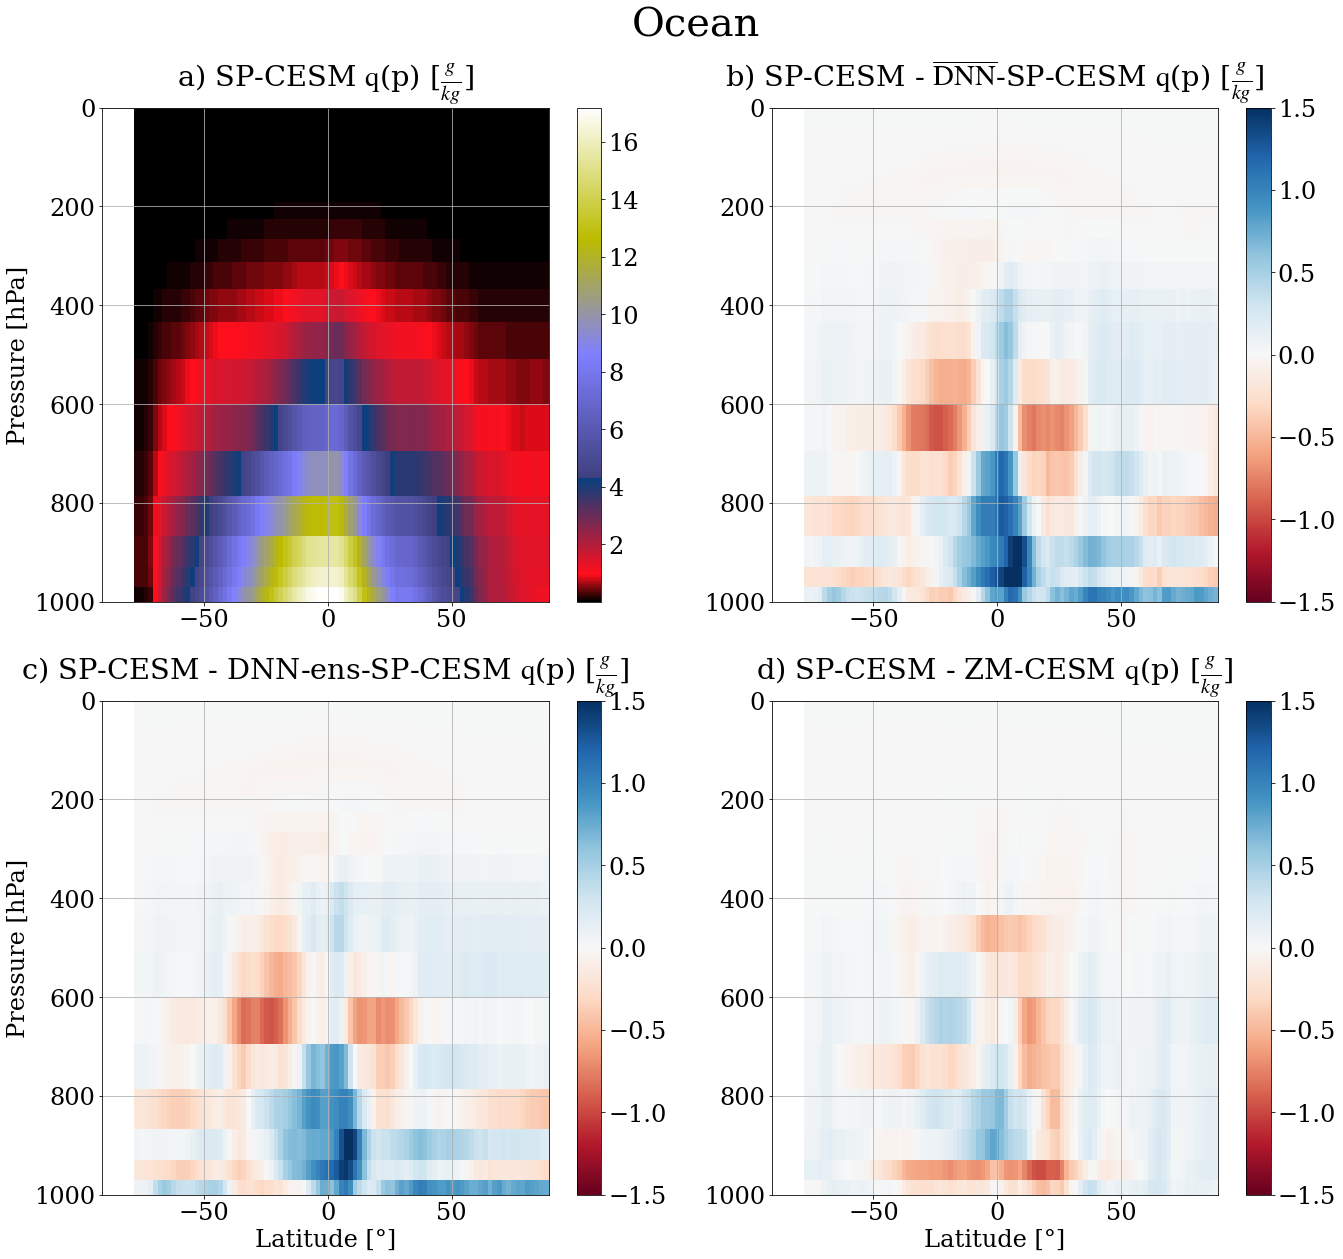

In [54]:
# plot zonal average temperatures and differences between the params Ocean
plt.figure(2,(22,20))


plt.suptitle('Ocean', fontsize=40, y=0.95)

plt.subplot(2,2,1)


plt.title(r'a) SP-CESM ${\mathrm{q}}$(p) [$\frac{g}{kg}$]',y=1.03)
plt.pcolor(lat,P[0:26]/100,np.nanmean(SPCESM_Q_mean_ocean,2),cmap='gist_stern')
plt.ylabel('Pressure [hPa]')

plt.colorbar()

sr=plt.gca()
plt.ylim(0,1000)
sr.invert_yaxis()
plt.grid(True)


plt.subplot(2,2,2)


plt.title(r'b) SP-CESM - $\overline{\mathrm{DNN}}$-SP-CESM ${\mathrm{q}}$(p) [$\frac{g}{kg}$]',y=1.03)
plt.pcolor(lat,P[0:26]/100,np.nanmean(SPCESM_Q_mean_ocean,2)-np.nanmean(ANN_Q_mean_ocean,2),cmap='RdBu',
          vmin=-1.5,vmax=1.5)

plt.colorbar()

sr=plt.gca()
plt.ylim(0,1000)
sr.invert_yaxis()
plt.grid(True)


plt.subplot(2,2,3)


plt.title(r'c) SP-CESM - DNN-ens-SP-CESM ${\mathrm{q}}$(p) [$\frac{g}{kg}$]',y=1.03)
plt.pcolor(lat,P[0:26]/100,np.nanmean(SPCESM_Q_mean_ocean,2)-np.nanmean(ANN_ens_Q_mean_ocean,2),cmap='RdBu',
           vmin=-1.5,vmax=1.5)
plt.xlabel('Latitude [°]')
plt.ylabel('Pressure [hPa]')

plt.colorbar()

sr=plt.gca()
plt.ylim(0,1000)
sr.invert_yaxis()
plt.grid(True)


plt.subplot(2,2,4)


plt.title(r'd) SP-CESM - ZM-CESM $\mathrm{q}}$(p) [$\frac{g}{kg}$]',y=1.03)
plt.pcolor(lat,P[0:26]/100,np.nanmean(SPCESM_Q_mean_ocean,2)-np.nanmean(ZM_CESM_Q_mean_ocean,2),cmap='RdBu',
           vmin=-1.5,vmax=1.5)
plt.xlabel('Latitude [°]')

plt.colorbar()

sr=plt.gca()
plt.ylim(0,1000)
sr.invert_yaxis()
plt.grid(True)

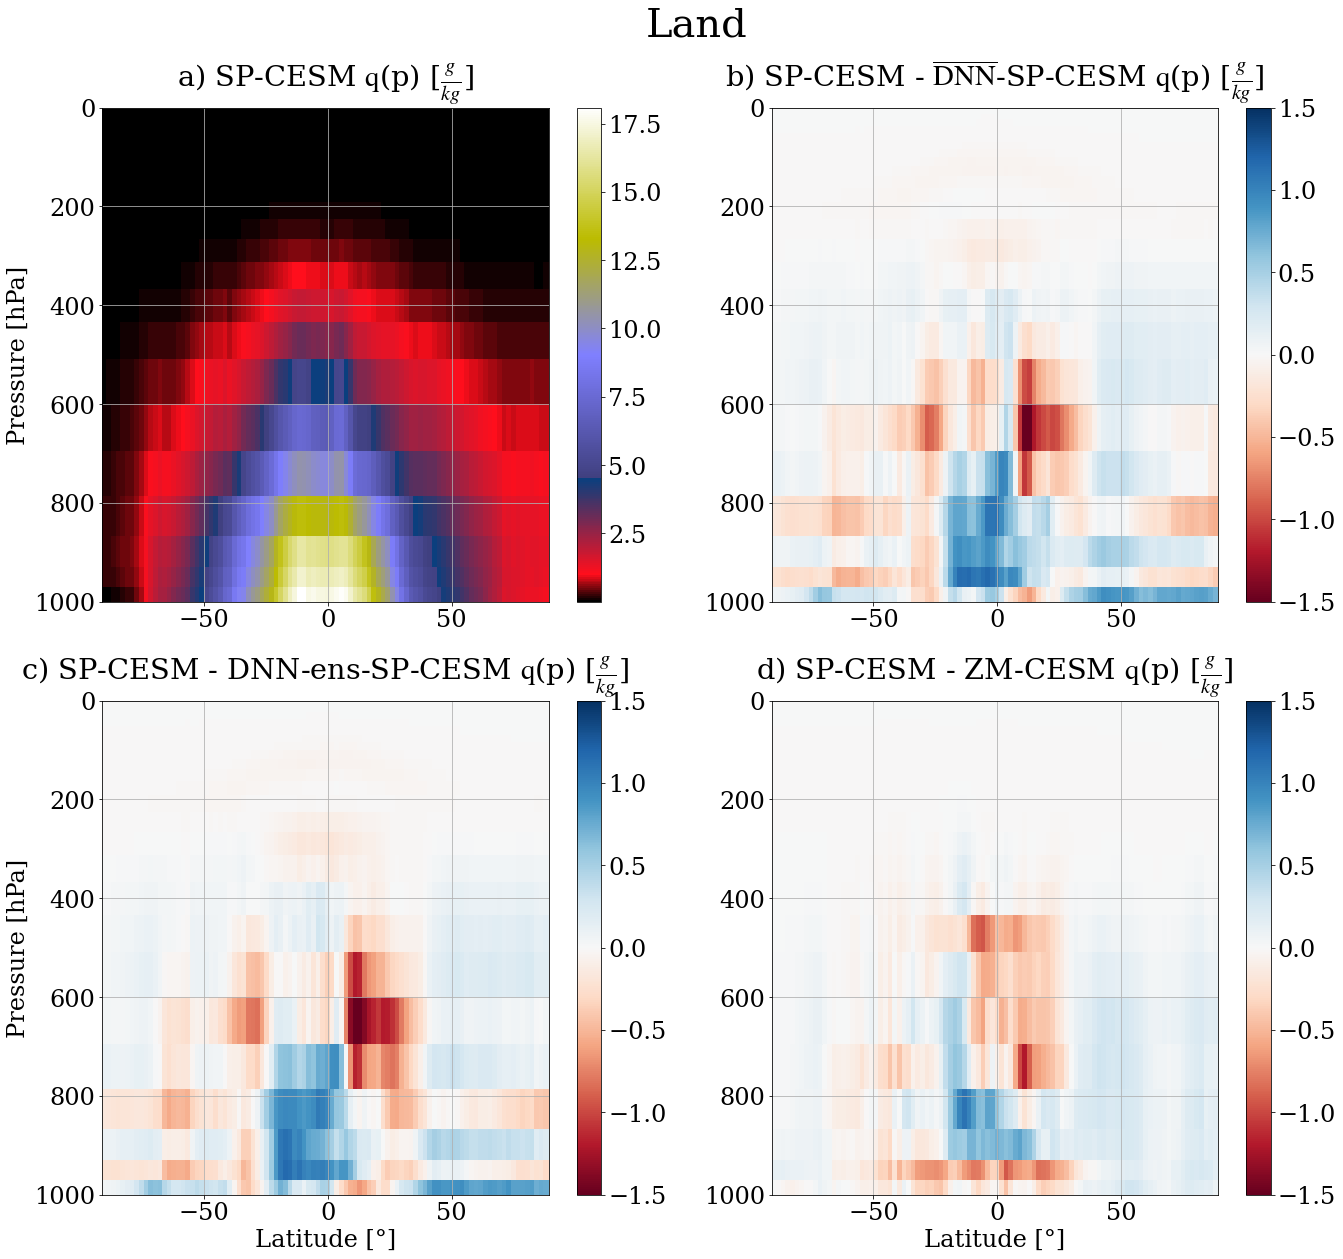

In [56]:
# plot zonal average temperatures and differences between the params Ocean
plt.figure(2,(22,20))


plt.suptitle('Land', fontsize=40, y=0.95)

plt.subplot(2,2,1)


plt.title(r'a) SP-CESM ${\mathrm{q}}$(p) [$\frac{g}{kg}$]',y=1.03)
plt.pcolor(lat,P[0:26]/100,np.nanmean(SPCESM_Q_mean_land,2),cmap='gist_stern')
plt.ylabel('Pressure [hPa]')

plt.colorbar()

sr=plt.gca()
plt.ylim(0,1000)
sr.invert_yaxis()
plt.grid(True)


plt.subplot(2,2,2)


plt.title(r'b) SP-CESM - $\overline{\mathrm{DNN}}$-SP-CESM ${\mathrm{q}}$(p) [$\frac{g}{kg}$]',y=1.03)
plt.pcolor(lat,P[0:26]/100,np.nanmean(SPCESM_Q_mean_land,2)-np.nanmean(ANN_Q_mean_land,2),cmap='RdBu',
          vmin=-1.5,vmax=1.5)

plt.colorbar()

sr=plt.gca()
plt.ylim(0,1000)
sr.invert_yaxis()
plt.grid(True)


plt.subplot(2,2,3)


plt.title(r'c) SP-CESM - DNN-ens-SP-CESM ${\mathrm{q}}$(p) [$\frac{g}{kg}$]',y=1.03)
plt.pcolor(lat,P[0:26]/100,np.nanmean(SPCESM_Q_mean_land,2)-np.nanmean(ANN_ens_Q_mean_land,2),cmap='RdBu',
           vmin=-1.5,vmax=1.5)
plt.xlabel('Latitude [°]')
plt.ylabel('Pressure [hPa]')

plt.colorbar()

sr=plt.gca()
plt.ylim(0,1000)
sr.invert_yaxis()
plt.grid(True)


plt.subplot(2,2,4)


plt.title(r'd) SP-CESM - ZM-CESM $\mathrm{q}}$(p) [$\frac{g}{kg}$]',y=1.03)
plt.pcolor(lat,P[0:26]/100,np.nanmean(SPCESM_Q_mean_land,2)-np.nanmean(ZM_CESM_Q_mean_land,2),cmap='RdBu',
           vmin=-1.5,vmax=1.5)
plt.xlabel('Latitude [°]')

plt.colorbar()

sr=plt.gca()
plt.ylim(0,1000)
sr.invert_yaxis()
plt.grid(True)

# Time series analysis 

load data sets but with coarser temporal reolution or over shorter period

In [8]:
#timeseries - time step of \overline{ANN}-CESM
DS2 = {}

kexp='NOCLDTEND'
for k in range(2):

    fpath = f'../SPCESM_data/Fronterra_runs/Cheyenne_runs/ENS_lin_boost_6_whole_year/'
    fname = f'CESM2_ANNs_ncpl-48_spcam-dt-20_2013-02-01_partial-coupling-NOCLDTEND_ens_lin_ANN_06_boost_whole_year.cam.h{k+2}.2013-0[2-6]-*-00000.nc'
    flist = glob.glob(fpath+fname)
    DS2[k] = xr.open_mfdataset(flist, decode_times=False)


In [9]:
# timeseries - time step of \overline{ANN}-CESM over first days of February 2013
DS2_short = {}

kexp='NOCLDTEND'
for k in range(2):

    fpath = f'../SPCESM_data/Fronterra_runs/Cheyenne_runs/ENS_lin_boost_6_whole_year/'
    fname = f'CESM2_ANNs_ncpl-48_spcam-dt-20_2013-02-01_partial-coupling-NOCLDTEND_ens_lin_ANN_06_boost_whole_year.cam.h{k+2}.2013-02-0[1-7]-*.nc'
    flist = glob.glob(fpath+fname)
    DS2_short[k] = xr.open_mfdataset(flist, decode_times=False)


In [10]:
# timeseries - time step of ANN-ens-CESM
DS2_stoch = {}

for k in range(2):

    fpath = f'../SPCESM_data/Fronterra_runs/Cheyenne_runs/stoch_ENS_lin_boost_6_whole_year/'
    fname = f'CESM2_ANNs_lin_ncpl-48_spcam-dt-20_2013-02-01_partial-coupling-NOCLDTEND_ANN_6_boost_sENS_5_whole_year.cam.h{k+2}.2013-0[2-6]-*-00000.nc'
    flist = glob.glob(fpath+fname)
    DS2_stoch[k] = xr.open_mfdataset(flist, decode_times=False)


In [11]:
# timeseries - time step of ANN-ens-CESM over first days of February 2013
DS2_stoch_short = {}

for k in range(2):

    fpath = f'../SPCESM_data/Fronterra_runs/Cheyenne_runs/stoch_ENS_lin_boost_6_whole_year/'
    fname = f'CESM2_ANNs_lin_ncpl-48_spcam-dt-20_2013-02-01_partial-coupling-NOCLDTEND_ANN_6_boost_sENS_5_whole_year.cam.h{k+2}.2013-02-0[1-7]-*.nc'
    flist = glob.glob(fpath+fname)
    DS2_stoch_short[k] = xr.open_mfdataset(flist, decode_times=False)


In [12]:
# timeseries - time step of SP-CESM
DS3 = {}

for k in range(2):
    fpath = f'/work/bd1179/from_Mistral/bd1179/b381624/'
    fname = f'CESM2_NN2_pelayout01_ens_07.cam.h1.2013-0[2-6]-*-00000.nc' 
    flist = glob.glob(fpath+fname)
    DS3[k] = xr.open_mfdataset(flist, decode_times=False)


In [13]:
DS2

{0: <xarray.Dataset>
 Dimensions:       (lat: 96, lon: 144, time: 149, lev: 26, ilev: 27, nbnd: 2)
 Coordinates:
   * lat           (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
   * lon           (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
   * lev           (lev) float64 3.545 7.389 13.97 23.94 ... 929.6 970.6 992.6
   * ilev          (ilev) float64 2.194 4.895 9.882 18.05 ... 956.0 985.1 1e+03
   * time          (time) float64 63.0 64.0 65.0 66.0 ... 208.0 209.0 210.0 211.0
 Dimensions without coordinates: nbnd
 Data variables: (12/39)
     gw            (time, lat) float64 dask.array<chunksize=(1, 96), meta=np.ndarray>
     hyam          (time, lev) float64 dask.array<chunksize=(1, 26), meta=np.ndarray>
     hybm          (time, lev) float64 dask.array<chunksize=(1, 26), meta=np.ndarray>
     P0            (time) float64 1e+05 1e+05 1e+05 1e+05 ... 1e+05 1e+05 1e+05
     hyai          (time, ilev) float64 dask.array<chunksize=(1, 27), meta=np.ndar

In [14]:
# timeseries - time step of CESM with ANN 6 boost parameterization
ANN_6_lin_boost = {}

kexp='NOCLDTEND'
for k in range(2):

    fpath = f'../SPCESM_data/Fronterra_runs/Cheyenne_runs/ANN_baselines_lin_boost_whole_year/ANN_6_lin_boost/'
    fname = f'CESM2_ANN_lin_ncpl-48_spcam-dt-20_2013-02-01_partial-coupling-NOCLDTEND_ANN_6_whole_year.cam.h{k+2}.2013-0[2-6]-*-00000.nc'
    flist = glob.glob(fpath+fname)
    ANN_6_lin_boost[k] = xr.open_mfdataset(flist, decode_times=False)


In [15]:
# timeseries - time step of CESM with ANN 5 parameterization
ANN_5 = {}

kexp='NOCLDTEND'
for k in range(2):

    fpath = f'../SPCESM_data/Fronterra_runs/Cheyenne_runs/ANN_baselines_lin_boost_whole_year/ANN_5_lin/'
    fname = f'CESM2_ANN_lin_ncpl-48_spcam-dt-20_2013-02-01_partial-coupling-NOCLDTEND_ANN_5_whole_year.cam.h{k+2}.2013-*-*-*.nc'
    flist = glob.glob(fpath+fname)
    ANN_5[k] = xr.open_mfdataset(flist, decode_times=False)


In [16]:
# timeseries - time step of CESM with ANN 4 parameterization
ANN_4 = {}

kexp='NOCLDTEND'
for k in range(2):

    fpath = f'../SPCESM_data/Fronterra_runs/Cheyenne_runs/ANN_baselines_lin_boost_whole_year/ANN_4_lin/'
    fname = f'CESM2_ANN_lin_ncpl-48_spcam-dt-20_2013-02-01_partial-coupling-NOCLDTEND_ANN_4_whole_year.cam.h{k+2}.2013-*-*-*.nc'
    flist = glob.glob(fpath+fname)
    ANN_4[k] = xr.open_mfdataset(flist, decode_times=False)


In [17]:
# timeseries - time step of CESM with ANN 7 parameterization
ANN_7 = {}

kexp='NOCLDTEND'
for k in range(2):

    fpath = f'../SPCESM_data/Fronterra_runs/Cheyenne_runs/ANN_baselines_lin_boost_whole_year/ANN_7_lin/'
    fname = f'CESM2_ANN_lin_ncpl-48_spcam-dt-20_2013-02-01_partial-coupling-NOCLDTEND_ANN_7_whole_year.cam.h{k+2}.2013-*-*-*.nc'
    flist = glob.glob(fpath+fname)
    ANN_7[k] = xr.open_mfdataset(flist, decode_times=False)


In [18]:
# timeseries - time step of CESM with ANN 2 parameterization
ANN_2 = {}

kexp='NOCLDTEND'
for k in range(2):

    fpath = f'../SPCESM_data/Fronterra_runs/Cheyenne_runs/ANN_baselines_lin_boost_whole_year/ANN_2_lin/'
    fname = f'CESM2_ANN_lin_ncpl-48_spcam-dt-20_2013-02-01_partial-coupling-NOCLDTEND_ANN_2_whole_year.cam.h{k+2}.2013-*-*-*.nc'
    flist = glob.glob(fpath+fname)
    ANN_2[k] = xr.open_mfdataset(flist, decode_times=False)


In [19]:
# timeseries - time step of CESM with ANN 3 parameterization
ANN_3 = {}

kexp='NOCLDTEND'
for k in range(2):

    fpath = f'../SPCESM_data/Fronterra_runs/Cheyenne_runs/ANN_baselines_lin_boost_whole_year/ANN_3_lin/'
    fname = f'CESM2_ANN_lin_ncpl-48_spcam-dt-20_2013-02-01_partial-coupling-NOCLDTEND_ANN_3_whole_year.cam.h{k+2}.2013-*-*-*.nc'
    flist = glob.glob(fpath+fname)
    ANN_3[k] = xr.open_mfdataset(flist, decode_times=False)


In [20]:
# timeseries - time step of CESM with ANN 1 parameterization
ANN_1 = {}

kexp='NOCLDTEND'
for k in range(2):

    fpath = f'../SPCESM_data/Fronterra_runs/Cheyenne_runs/ANN_baselines_lin_boost_whole_year/ANN_1_lin/'
    fname = f'CESM2_ANN_lin_ncpl-48_spcam-dt-20_2013-02-01_partial-coupling-NOCLDTEND_ANN_1_whole_year.cam.h{k+2}.2013-*-*-*.nc'
    flist = glob.glob(fpath+fname)
    ANN_1[k] = xr.open_mfdataset(flist, decode_times=False)


In [21]:
# timeseries - time step of CESM with ANN 6 boost parameterization over first days
ANN_6_first_days = {}

kexp='NOCLDTEND'
for k in range(2):

    fpath = f'../SPCESM_data/Fronterra_runs/Cheyenne_runs/ANN_baselines_lin_boost_whole_year/ANN_6_lin_boost/'
    fname = f'CESM2_ANN_lin_ncpl-48_spcam-dt-20_2013-02-01_partial-coupling-NOCLDTEND_ANN_6_whole_year.cam.h{k+2}.2013-02-0[1-7]-*.nc'
    flist = glob.glob(fpath+fname)
    ANN_6_first_days[k] = xr.open_mfdataset(flist, decode_times=False)


In [22]:
# timeseries - time step of SP-CESM over first days of February 2013
DS3_first_days = {}

for k in range(2):
    fpath = f'/work/bd1179/from_Mistral/bd1179/b381624/'
    fname = f'CESM2_NN2_pelayout01_ens_07.cam.h1.2013-02-0[1-7]-*.nc' 
    flist = glob.glob(fpath+fname)
    DS3_first_days[k] = xr.open_mfdataset(flist, decode_times=False)


In [23]:
ANN_7

{0: <xarray.Dataset>
 Dimensions:       (lat: 96, lon: 144, time: 140, lev: 26, ilev: 27, nbnd: 2)
 Coordinates:
   * lat           (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
   * lon           (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
   * lev           (lev) float64 3.545 7.389 13.97 23.94 ... 929.6 970.6 992.6
   * ilev          (ilev) float64 2.194 4.895 9.882 18.05 ... 956.0 985.1 1e+03
   * time          (time) float64 62.02 62.04 62.06 62.08 ... 64.88 64.9 64.92
 Dimensions without coordinates: nbnd
 Data variables: (12/39)
     gw            (time, lat) float64 dask.array<chunksize=(1, 96), meta=np.ndarray>
     hyam          (time, lev) float64 dask.array<chunksize=(1, 26), meta=np.ndarray>
     hybm          (time, lev) float64 dask.array<chunksize=(1, 26), meta=np.ndarray>
     P0            (time) float64 1e+05 1e+05 1e+05 1e+05 ... 1e+05 1e+05 1e+05
     hyai          (time, ilev) float64 dask.array<chunksize=(1, 27), meta=np.ndarray

In [24]:
DS3_short=DS3[1]['time'][np.arange(0,2400,16)]

In [25]:
DS3_short


<xarray.DataArray 'time' (time: 150)>
array([3680., 3681., 3682., 3683., 3684., 3685., 3686., 3687., 3688., 3689.,
       3690., 3691., 3692., 3693., 3694., 3695., 3696., 3697., 3698., 3699.,
       3700., 3701., 3702., 3703., 3704., 3705., 3706., 3707., 3708., 3709.,
       3710., 3711., 3712., 3713., 3714., 3715., 3716., 3717., 3718., 3719.,
       3720., 3721., 3722., 3723., 3724., 3725., 3726., 3727., 3728., 3729.,
       3730., 3731., 3732., 3733., 3734., 3735., 3736., 3737., 3738., 3739.,
       3740., 3741., 3742., 3743., 3744., 3745., 3746., 3747., 3748., 3749.,
       3750., 3751., 3752., 3753., 3754., 3755., 3756., 3757., 3758., 3759.,
       3760., 3761., 3762., 3763., 3764., 3765., 3766., 3767., 3768., 3769.,
       3770., 3771., 3772., 3773., 3774., 3775., 3776., 3777., 3778., 3779.,
       3780., 3781., 3782., 3783., 3784., 3785., 3786., 3787., 3788., 3789.,
       3790., 3791., 3792., 3793., 3794., 3795., 3796., 3797., 3798., 3799.,
       3800., 3801., 3802., 3803., 3804., 3805., 3806., 3807., 3808., 3809.,
       3810., 3811., 3812., 3813., 3814., 3815., 3816., 3817., 3818., 3819.,
       3820., 3821., 3822., 3823., 3824., 3825., 3826., 3827., 3828., 3829.])
Coordinates:
  * time     (time) float64 3.68e+03 3.681e+03 3.682e+03 ... 3.828e+03 3.829e+03
Attributes:
    long_name:  time
    units:      days since 2003-01-02 00:00:00
    calendar:   noleap
    bounds:     time_bnds

In [26]:
ANN_1[1]['time']

<xarray.DataArray 'time' (time: 96)>
array([62.020833, 62.041667, 62.0625  , 62.083333, 62.104167, 62.125   ,
       62.145833, 62.166667, 62.1875  , 62.208333, 62.229167, 62.25    ,
       62.270833, 62.291667, 62.3125  , 62.333333, 62.354167, 62.375   ,
       62.395833, 62.416667, 62.4375  , 62.458333, 62.479167, 62.5     ,
       62.520833, 62.541667, 62.5625  , 62.583333, 62.604167, 62.625   ,
       62.645833, 62.666667, 62.6875  , 62.708333, 62.729167, 62.75    ,
       62.770833, 62.791667, 62.8125  , 62.833333, 62.854167, 62.875   ,
       62.895833, 62.916667, 62.9375  , 62.958333, 62.979167, 63.      ,
       63.020833, 63.041667, 63.0625  , 63.083333, 63.104167, 63.125   ,
       63.145833, 63.166667, 63.1875  , 63.208333, 63.229167, 63.25    ,
       63.270833, 63.291667, 63.3125  , 63.333333, 63.354167, 63.375   ,
       63.395833, 63.416667, 63.4375  , 63.458333, 63.479167, 63.5     ,
       63.520833, 63.541667, 63.5625  , 63.583333, 63.604167, 63.625   ,
       63.645833, 63.666667, 63.6875  , 63.708333, 63.729167, 63.75    ,
       63.770833, 63.791667, 63.8125  , 63.833333, 63.854167, 63.875   ,
       63.895833, 63.916667, 63.9375  , 63.958333, 63.979167, 64.      ])
Coordinates:
  * time     (time) float64 62.02 62.04 62.06 62.08 ... 63.94 63.96 63.98 64.0
Attributes:
    long_name:  time
    units:      days since 2012-12-01 00:00:00
    calendar:   noleap
    bounds:     time_bnds

In [27]:
DS2[1]['time']

<xarray.DataArray 'time' (time: 149)>
array([ 63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,
        75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,
        87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121., 122.,
       123., 124., 125., 126., 127., 128., 129., 130., 131., 132., 133., 134.,
       135., 136., 137., 138., 139., 140., 141., 142., 143., 144., 145., 146.,
       147., 148., 149., 150., 151., 152., 153., 154., 155., 156., 157., 158.,
       159., 160., 161., 162., 163., 164., 165., 166., 167., 168., 169., 170.,
       171., 172., 173., 174., 175., 176., 177., 178., 179., 180., 181., 182.,
       183., 184., 185., 186., 187., 188., 189., 190., 191., 192., 193., 194.,
       195., 196., 197., 198., 199., 200., 201., 202., 203., 204., 205., 206.,
       207., 208., 209., 210., 211.])
Coordinates:
  * time     (time) float64 63.0 64.0 65.0 66.0 67.0 ... 208.0 209.0 210.0 211.0
Attributes:
    long_name:  time
    units:      days since 2012-12-01 00:00:00
    calendar:   noleap
    bounds:     time_bnds

In [28]:
# select troposheric levels below 200 hpa

In [29]:
below_200=np.where(P[0:26]/100>200)[0]

In [30]:
below_200

array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])

In [31]:
# compute RMSE between SP-CESM and \overline{ANN}-CESM for T
SPCESM_ANN_CESM_T_RSME_field=(DS3[1]['TBC'][np.arange(0,2400,16)][0:149].values-DS2[1]['T2'].values)**2

In [32]:
# compute RMSE between SP-CESM and ANN-ens-CESM for T

SPCESM_ANN_ens_CESM_T_RSME_field=(DS3[1]['TBC'][np.arange(0,2400,16)][0:149].values-DS2_stoch[1]['T2'].values)**2

In [33]:
# compute RMSE between SP-CESM and ANN 6 boost for T

SPCESM_ANN_6_lin_boost_CESM_T_RSME_field=(DS3[1]['TBC'][np.arange(0,2400,16)][0:149].values-ANN_6_lin_boost[1]['T2'].values)**2

In [34]:
# compute RMSE mean for \overline{ANN}-CESM
SPCESM_ANN_CESM_T_RSME_field_lat_lon_mean_below_200=np.sqrt(np.mean(np.mean(np.mean(SPCESM_ANN_CESM_T_RSME_field,3),2)[:,below_200],1))

In [35]:
# compute RMSE mean for ANN-ens-CESM

SPCESM_ANN_ens_CESM_T_RSME_field_lat_lon_mean_below_200=np.sqrt(np.mean(np.mean(np.mean(SPCESM_ANN_ens_CESM_T_RSME_field,3),2)[:,below_200],1))

In [36]:
# compute RMSE mean for ANN 6


SPCESM_ANN_6_lin_boost_CESM_T_RSME_field_lat_lon_mean_below_200=np.sqrt(np.mean(np.mean(np.mean(SPCESM_ANN_6_lin_boost_CESM_T_RSME_field,3),2)[:,below_200],1))

In [37]:
# compute individual RMSEs for ANNs

SPCESM_ANN_1_CESM_T_RSME_field=(DS3_first_days[1]['TBC'][0:ANN_1[1]['time'].values.size].values-ANN_1[1]['T2'].values)**2
SPCESM_ANN_2_CESM_T_RSME_field=(DS3_first_days[1]['TBC'][0:ANN_2[1]['time'].values.size].values-ANN_2[1]['T2'].values)**2
SPCESM_ANN_3_CESM_T_RSME_field=(DS3_first_days[1]['TBC'][0:ANN_3[1]['time'].values.size].values-ANN_3[1]['T2'].values)**2
SPCESM_ANN_4_CESM_T_RSME_field=(DS3_first_days[1]['TBC'][0:ANN_4[1]['time'].values.size].values-ANN_4[1]['T2'].values)**2
SPCESM_ANN_5_CESM_T_RSME_field=(DS3_first_days[1]['TBC'][0:ANN_5[1]['time'].values.size].values-ANN_5[1]['T2'].values)**2
SPCESM_ANN_7_CESM_T_RSME_field=(DS3_first_days[1]['TBC'][0:ANN_7[1]['time'].values.size].values-ANN_7[1]['T2'].values)**2




In [38]:
# compute RSMEs over first days 
SPCESM_ANN_CESM_first_days_T_RSME_field=(DS3_first_days[1]['TBC'][1:].values-DS2_short[1]['T2'].values)**2
SPCESM_ANN_ens_CESM_first_days_T_RSME_field=(DS3_first_days[1]['TBC'][1:].values-DS2_stoch_short[1]['T2'].values)**2
SPCESM_ANN_6_lin_boost_CESM_first_days_T_RSME_field=(DS3_first_days[1]['TBC'][1:].values-ANN_6_first_days[1]['T2'].values)**2


In [39]:
# average RMSEs of indivual ANNs 
SPCESM_ANN_1_CESM_T_RSME_field_lat_lon_mean_below_200=np.sqrt(np.mean(np.mean(np.mean(SPCESM_ANN_1_CESM_T_RSME_field,3),2)[:,below_200],1))
SPCESM_ANN_2_CESM_T_RSME_field_lat_lon_mean_below_200=np.sqrt(np.mean(np.mean(np.mean(SPCESM_ANN_2_CESM_T_RSME_field,3),2)[:,below_200],1))
SPCESM_ANN_3_CESM_T_RSME_field_lat_lon_mean_below_200=np.sqrt(np.mean(np.mean(np.mean(SPCESM_ANN_3_CESM_T_RSME_field,3),2)[:,below_200],1))
SPCESM_ANN_4_CESM_T_RSME_field_lat_lon_mean_below_200=np.sqrt(np.mean(np.mean(np.mean(SPCESM_ANN_4_CESM_T_RSME_field,3),2)[:,below_200],1))
SPCESM_ANN_5_CESM_T_RSME_field_lat_lon_mean_below_200=np.sqrt(np.mean(np.mean(np.mean(SPCESM_ANN_5_CESM_T_RSME_field,3),2)[:,below_200],1))
SPCESM_ANN_7_CESM_T_RSME_field_lat_lon_mean_below_200=np.sqrt(np.mean(np.mean(np.mean(SPCESM_ANN_7_CESM_T_RSME_field,3),2)[:,below_200],1))





In [40]:
# average RMSEs
SPCESM_ANN_CESM_first_days_T_RSME_field_lat_lon_mean_below_200=np.sqrt(np.mean(np.mean(np.mean(SPCESM_ANN_CESM_first_days_T_RSME_field
                                                                                               ,3),2)[:,below_200],1))
SPCESM_ANN_ens_CESM_first_days_T_RSME_field_lat_lon_mean_below_200=np.sqrt(np.mean(np.mean(np.mean(SPCESM_ANN_ens_CESM_first_days_T_RSME_field
                                                                                                   ,3),2)[:,below_200],1))
SPCESM_ANN_6_lin_CESM_first_days_T_RSME_field_lat_lon_mean_below_200=np.sqrt(np.mean(np.mean(np.mean(SPCESM_ANN_6_lin_boost_CESM_first_days_T_RSME_field
                                                                                                   ,3),2)[:,below_200],1))

In [41]:
SPCESM_ANN_3_CESM_T_RSME_field_lat_lon_mean_below_200

array([4.9237204, 4.9222198, 4.9212685, 4.920183 , 4.9190006, 4.9173493,
       4.915546 , 4.913757 , 4.9118314, 4.9099474, 4.9077797, 4.9053025,
       4.902233 , 4.8992047, 4.8962984, 4.894035 , 4.891995 , 4.890263 ,
       4.888783 , 4.887779 , 4.887441 , 4.8873725, 4.8874607, 4.8877416,
       4.888234 , 4.889114 , 4.8902264, 4.8916354, 4.892858 , 4.893904 ,
       4.8949237, 4.8955626, 4.89603  , 4.8965   , 4.896793 , 4.896563 ,
       4.896129 , 4.895742 , 4.8950715, 4.894007 , 4.892751 , 4.891664 ,
       4.890654 , 4.8898506, 4.888909 , 4.8878703, 4.886566 , 4.885074 ,
       4.883546 , 4.8817124, 4.879746 , 4.877854 , 4.8761034, 4.8742704,
       4.8723516, 4.8699384, 4.866943 , 4.863331 , 4.8592153, 4.85482  ,
       4.850249 , 4.845722 , 4.841006 , 4.836354 , 4.8318443, 4.8278913,
       4.8243227, 4.8208065, 4.817337 , 4.814103 , 4.810713 , 4.807391 ,
       4.8042564, 4.8014035, 4.7983913, 4.7950535, 4.7912335, 4.7874765,
       4.7838945, 4.7801237, 4.7761254, 4.7719665, 

(62.0, 68.0)

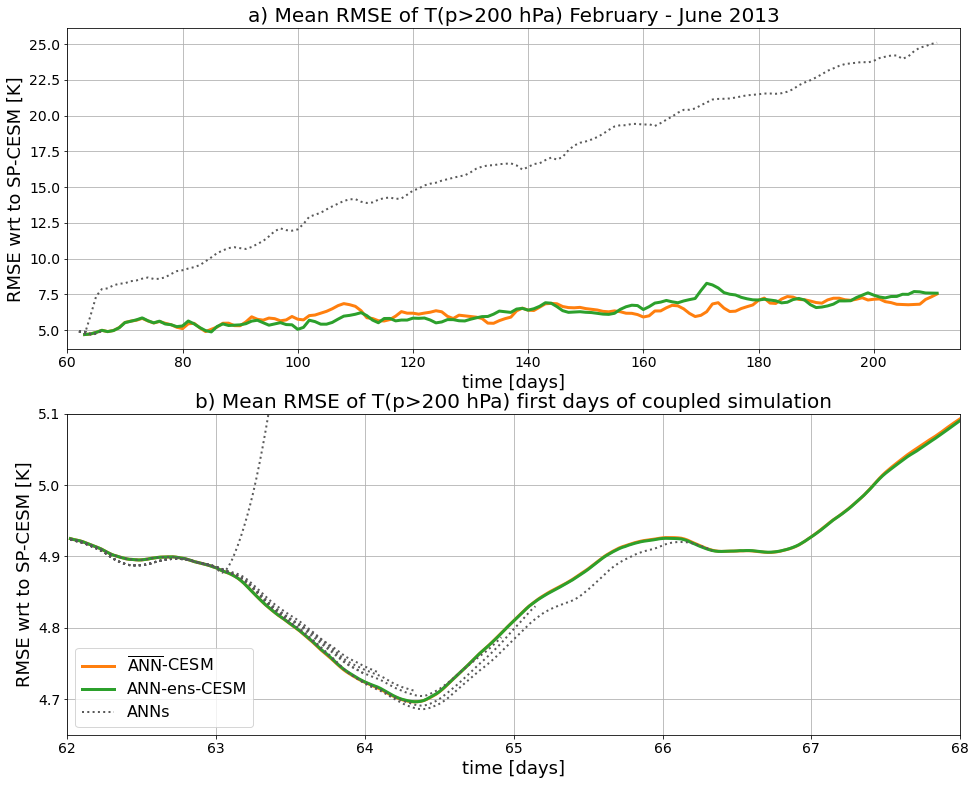

In [46]:
# plot RMSE time series for T(p>200 hPa)

plt.figure(1,(16,13))
plt.subplot(2,1,1)
plt.title('a) Mean RMSE of T(p>200 hPa) February - June 2013',fontsize=20)
plt.plot(DS2[0]['time'],SPCESM_ANN_CESM_T_RSME_field_lat_lon_mean_below_200,color='#ff7f0e',linewidth=3)
plt.plot(DS2[0]['time'],SPCESM_ANN_ens_CESM_T_RSME_field_lat_lon_mean_below_200,color='#2ca02c',linewidth=3)
plt.plot(DS2[0]['time'],SPCESM_ANN_6_lin_boost_CESM_T_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_1[0]['time'],SPCESM_ANN_1_CESM_T_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_2[0]['time'],SPCESM_ANN_2_CESM_T_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_3[0]['time'],SPCESM_ANN_3_CESM_T_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_4[0]['time'],SPCESM_ANN_4_CESM_T_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_5[0]['time'],SPCESM_ANN_5_CESM_T_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_7[0]['time'],SPCESM_ANN_7_CESM_T_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.ylabel('RMSE wrt to SP-CESM [K]',fontsize=18)
plt.xlabel('time [days]',fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlim(60,215)
plt.grid(True)

plt.subplot(2,1,2)

plt.title('b) Mean RMSE of T(p>200 hPa) first days of coupled simulation',fontsize=20)

plt.plot(DS2_short[0]['time'],SPCESM_ANN_CESM_first_days_T_RSME_field_lat_lon_mean_below_200,color='#ff7f0e',linewidth=3,
         label=r'$\overline{\mathrm{ANN}}$-CESM')
plt.plot(DS2_short[0]['time'],SPCESM_ANN_ens_CESM_first_days_T_RSME_field_lat_lon_mean_below_200,color='#2ca02c',linewidth=3,
        label=r'ANN-ens-CESM')
plt.plot(ANN_1[0]['time'],SPCESM_ANN_1_CESM_T_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2,label='ANNs')
plt.plot(ANN_2[0]['time'],SPCESM_ANN_2_CESM_T_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_3[0]['time'],SPCESM_ANN_3_CESM_T_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_4[0]['time'],SPCESM_ANN_4_CESM_T_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_5[0]['time'],SPCESM_ANN_5_CESM_T_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(DS2_short[0]['time'],SPCESM_ANN_6_lin_CESM_first_days_T_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_7[0]['time'],SPCESM_ANN_7_CESM_T_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.ylim(4.65,5.1)
#plt.yscale('log')
plt.ylabel('RMSE wrt to SP-CESM [K]',fontsize=18)
plt.xlabel('time [days]',fontsize=18)
plt.legend(fontsize=16)
plt.yticks(np.arange(4.7,5.13,0.1),fontsize=14)
plt.xticks(fontsize=14)
plt.grid(True)

plt.xlim(62,68)

(62.0, 68.0)

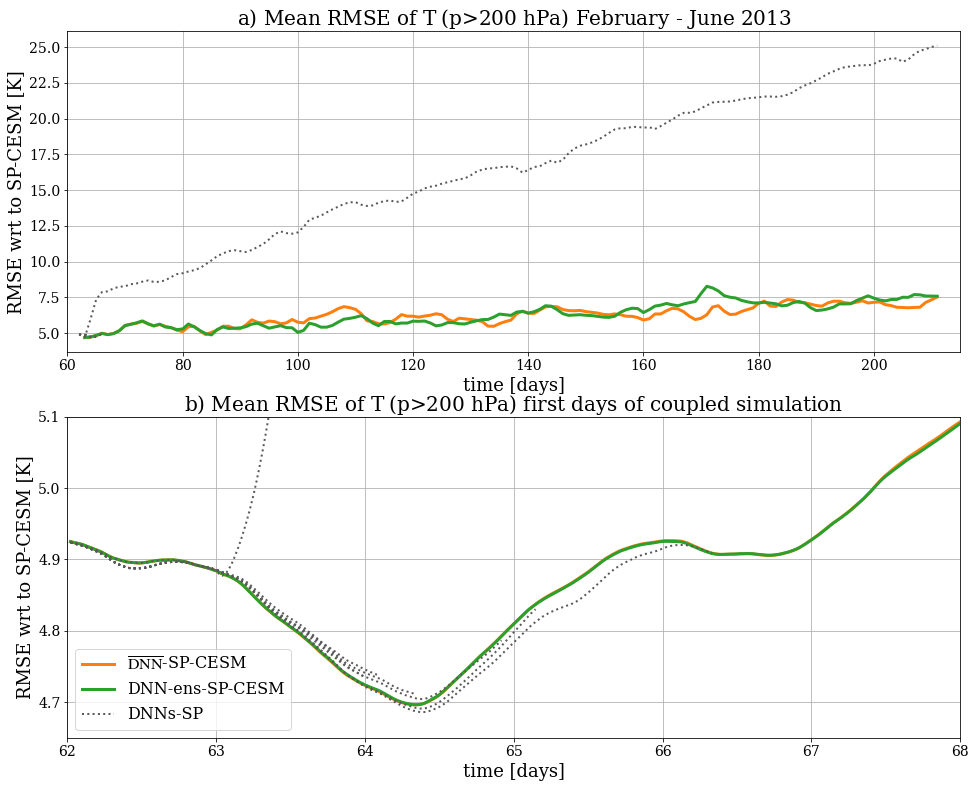

In [44]:
# plot RMSE time series for T(p>200 hPa)

plt.figure(1,(16,13))
plt.subplot(2,1,1)
plt.title(r'a) Mean RMSE of T$~$(p>200 hPa) February - June 2013',fontsize=20)
plt.plot(DS2[0]['time'],SPCESM_ANN_CESM_T_RSME_field_lat_lon_mean_below_200,color='#ff7f0e',linewidth=3)
plt.plot(DS2[0]['time'],SPCESM_ANN_ens_CESM_T_RSME_field_lat_lon_mean_below_200,color='#2ca02c',linewidth=3)
plt.plot(DS2[0]['time'],SPCESM_ANN_6_lin_boost_CESM_T_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_1[0]['time'],SPCESM_ANN_1_CESM_T_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_2[0]['time'],SPCESM_ANN_2_CESM_T_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_3[0]['time'],SPCESM_ANN_3_CESM_T_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_4[0]['time'],SPCESM_ANN_4_CESM_T_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_5[0]['time'],SPCESM_ANN_5_CESM_T_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_7[0]['time'],SPCESM_ANN_7_CESM_T_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.ylabel('RMSE wrt to SP-CESM [K]',fontsize=18)
plt.xlabel('time [days]',fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlim(60,215)
plt.grid(True)

plt.subplot(2,1,2)

plt.title(r'b) Mean RMSE of T$~$(p>200 hPa) first days of coupled simulation',fontsize=20)

plt.plot(DS2_short[0]['time'],SPCESM_ANN_CESM_first_days_T_RSME_field_lat_lon_mean_below_200,color='#ff7f0e',linewidth=3,
         label=r'$\overline{\mathrm{DNN}}$-SP-CESM')
plt.plot(DS2_short[0]['time'],SPCESM_ANN_ens_CESM_first_days_T_RSME_field_lat_lon_mean_below_200,color='#2ca02c',linewidth=3,
        label=r'DNN-ens-SP-CESM')
plt.plot(ANN_1[0]['time'],SPCESM_ANN_1_CESM_T_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2,label='DNNs-SP')
plt.plot(ANN_2[0]['time'],SPCESM_ANN_2_CESM_T_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_3[0]['time'],SPCESM_ANN_3_CESM_T_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_4[0]['time'],SPCESM_ANN_4_CESM_T_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_5[0]['time'],SPCESM_ANN_5_CESM_T_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(DS2_short[0]['time'],SPCESM_ANN_6_lin_CESM_first_days_T_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_7[0]['time'],SPCESM_ANN_7_CESM_T_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.ylim(4.65,5.1)
#plt.yscale('log')
plt.ylabel('RMSE wrt to SP-CESM [K]',fontsize=18)
plt.xlabel('time [days]',fontsize=18)
plt.legend(fontsize=16)
plt.yticks(np.arange(4.7,5.13,0.1),fontsize=14)
plt.xticks(fontsize=14)
plt.grid(True)

plt.xlim(62,68)

In [46]:
# compute RMSEs for specific humidity 
SPCESM_ANN_CESM_Q_RSME_field=(DS3[1]['QBC'][np.arange(0,2400,16)][0:149].values-DS2[1]['Q2'].values)**2
SPCESM_ANN_ens_CESM_Q_RSME_field=(DS3[1]['QBC'][np.arange(0,2400,16)][0:149].values-DS2_stoch[1]['Q2'].values)**2
SPCESM_ANN_6_lin_boost_CESM_Q_RSME_field=(DS3[1]['QBC'][np.arange(0,2400,16)][0:149].values-ANN_6_lin_boost[1]['Q2'].values)**2


In [47]:
# compute averages RMSEs for troposheric specific humidity 

SPCESM_ANN_CESM_Q_RSME_field_lat_lon_mean_below_200=1000*np.sqrt(np.mean(np.mean(np.mean(SPCESM_ANN_CESM_Q_RSME_field,
                                                                                    3),2)[:,below_200],1))

SPCESM_ANN_ens_CESM_Q_RSME_field_lat_lon_mean_below_200=1000*np.sqrt(np.mean(np.mean(np.mean(SPCESM_ANN_ens_CESM_Q_RSME_field,
                                                                                        3),2)[:,below_200],1))

SPCESM_ANN_6_lin_boost_CESM_Q_RSME_field_lat_lon_mean_below_200=1000*np.sqrt(np.mean(np.mean(np.mean(SPCESM_ANN_6_lin_boost_CESM_Q_RSME_field,
                                                                                                3),2)[:,below_200],1))

In [48]:
#RMSEs of individual ANNs for specific humidity
SPCESM_ANN_1_CESM_Q_RSME_field=(DS3_first_days[1]['QBC'][0:ANN_1[1]['time'].values.size].values-ANN_1[1]['Q2'].values)**2
SPCESM_ANN_2_CESM_Q_RSME_field=(DS3_first_days[1]['QBC'][0:ANN_2[1]['time'].values.size].values-ANN_2[1]['Q2'].values)**2
SPCESM_ANN_3_CESM_Q_RSME_field=(DS3_first_days[1]['QBC'][0:ANN_3[1]['time'].values.size].values-ANN_3[1]['Q2'].values)**2
SPCESM_ANN_4_CESM_Q_RSME_field=(DS3_first_days[1]['QBC'][0:ANN_4[1]['time'].values.size].values-ANN_4[1]['Q2'].values)**2
SPCESM_ANN_5_CESM_Q_RSME_field=(DS3_first_days[1]['QBC'][0:ANN_5[1]['time'].values.size].values-ANN_5[1]['Q2'].values)**2
SPCESM_ANN_7_CESM_Q_RSME_field=(DS3_first_days[1]['QBC'][0:ANN_7[1]['time'].values.size].values-ANN_7[1]['Q2'].values)**2




In [49]:
SPCESM_ANN_CESM_first_days_Q_RSME_field=(DS3_first_days[1]['QBC'][1:].values-DS2_short[1]['Q2'].values)**2
SPCESM_ANN_ens_CESM_first_days_Q_RSME_field=(DS3_first_days[1]['QBC'][1:].values-DS2_stoch_short[1]['Q2'].values)**2
SPCESM_ANN_6_lin_boost_CESM_first_days_Q_RSME_field=(DS3_first_days[1]['QBC'][1:].values-ANN_6_first_days[1]['Q2'].values)**2


In [50]:
SPCESM_ANN_CESM_first_days_Q_RSME_field_lat_lon_mean_below_200=1000*np.sqrt(np.mean(np.mean(np.mean(SPCESM_ANN_CESM_first_days_Q_RSME_field
                                                                                               ,3),2)[:,below_200],1))
SPCESM_ANN_ens_CESM_first_days_Q_RSME_field_lat_lon_mean_below_200=1000*np.sqrt(np.mean(np.mean(np.mean(SPCESM_ANN_ens_CESM_first_days_Q_RSME_field
                                                                                                   ,3),2)[:,below_200],1))
SPCESM_ANN_6_lin_CESM_first_days_Q_RSME_field_lat_lon_mean_below_200=1000*np.sqrt(np.mean(np.mean(np.mean(SPCESM_ANN_6_lin_boost_CESM_first_days_Q_RSME_field
                                                                                                   ,3),2)[:,below_200],1))

In [51]:
#averages of RMSEs of individual ANNs for troposheric specific humidity

SPCESM_ANN_1_CESM_Q_RSME_field_lat_lon_mean_below_200=1000*np.sqrt(np.mean(np.mean(np.mean(SPCESM_ANN_1_CESM_Q_RSME_field,3),2)[:,below_200],1))
SPCESM_ANN_2_CESM_Q_RSME_field_lat_lon_mean_below_200=1000*np.sqrt(np.mean(np.mean(np.mean(SPCESM_ANN_2_CESM_Q_RSME_field,3),2)[:,below_200],1))
SPCESM_ANN_3_CESM_Q_RSME_field_lat_lon_mean_below_200=1000*np.sqrt(np.mean(np.mean(np.mean(SPCESM_ANN_3_CESM_Q_RSME_field,3),2)[:,below_200],1))
SPCESM_ANN_4_CESM_Q_RSME_field_lat_lon_mean_below_200=1000*np.sqrt(np.mean(np.mean(np.mean(SPCESM_ANN_4_CESM_Q_RSME_field,3),2)[:,below_200],1))
SPCESM_ANN_5_CESM_Q_RSME_field_lat_lon_mean_below_200=1000*np.sqrt(np.mean(np.mean(np.mean(SPCESM_ANN_5_CESM_Q_RSME_field,3),2)[:,below_200],1))
SPCESM_ANN_7_CESM_Q_RSME_field_lat_lon_mean_below_200=1000*np.sqrt(np.mean(np.mean(np.mean(SPCESM_ANN_7_CESM_Q_RSME_field,3),2)[:,below_200],1))





(62.0, 68.0)

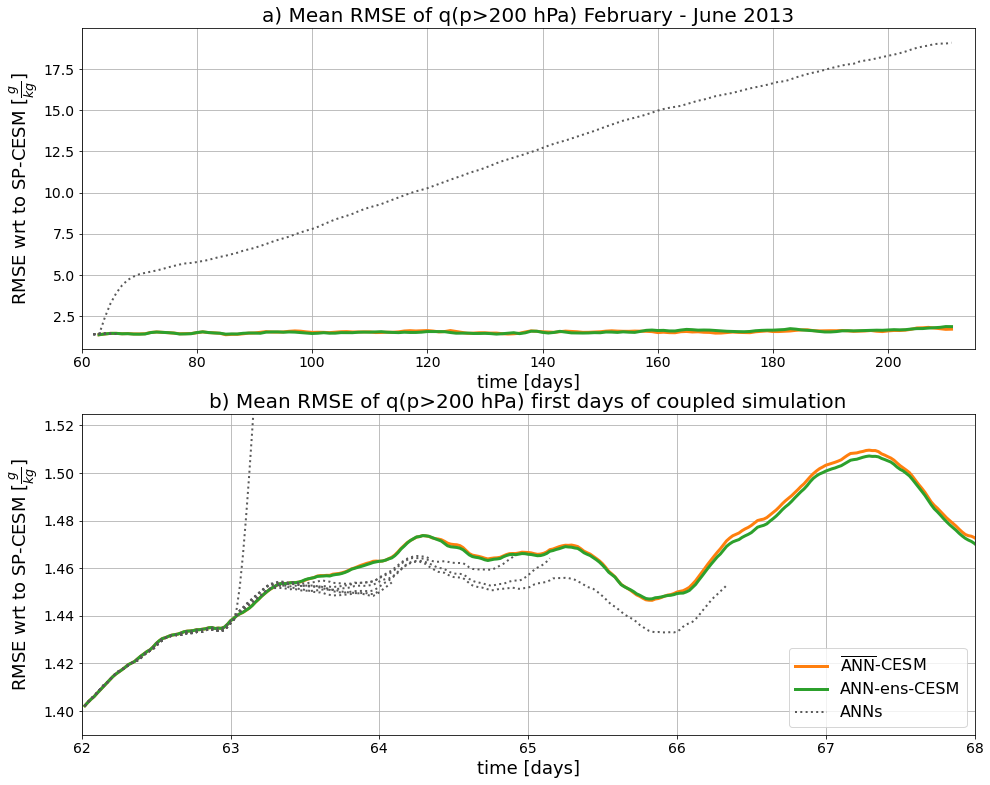

In [62]:
#plot averages of ANNs for specific humidity 

plt.figure(1,(16,13))
plt.subplot(2,1,1)
plt.title('a) Mean RMSE of q(p>200 hPa) February - June 2013',fontsize=20)
plt.plot(DS2[0]['time'],SPCESM_ANN_CESM_Q_RSME_field_lat_lon_mean_below_200,color='#ff7f0e',linewidth=3)
plt.plot(DS2[0]['time'],SPCESM_ANN_ens_CESM_Q_RSME_field_lat_lon_mean_below_200,color='#2ca02c',linewidth=3)
plt.plot(DS2[0]['time'],SPCESM_ANN_6_lin_boost_CESM_Q_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_1[0]['time'],SPCESM_ANN_1_CESM_Q_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_2[0]['time'],SPCESM_ANN_2_CESM_Q_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_3[0]['time'],SPCESM_ANN_3_CESM_Q_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_4[0]['time'],SPCESM_ANN_4_CESM_Q_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_5[0]['time'],SPCESM_ANN_5_CESM_Q_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_7[0]['time'],SPCESM_ANN_7_CESM_Q_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.ylabel(r'RMSE wrt to SP-CESM [$\frac{g}{kg}$]',fontsize=18)
plt.xlabel('time [days]',fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlim(60,215)
plt.grid(True)

plt.subplot(2,1,2)

plt.title('b) Mean RMSE of q(p>200 hPa) first days of coupled simulation',fontsize=20)

plt.plot(DS2_short[0]['time'],SPCESM_ANN_CESM_first_days_Q_RSME_field_lat_lon_mean_below_200,color='#ff7f0e',linewidth=3,
         label=r'$\overline{\mathrm{ANN}}$-CESM')
plt.plot(DS2_short[0]['time'],SPCESM_ANN_ens_CESM_first_days_Q_RSME_field_lat_lon_mean_below_200,color='#2ca02c',linewidth=3,
        label=r'ANN-ens-CESM')
plt.plot(ANN_1[0]['time'],SPCESM_ANN_1_CESM_Q_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2,label='ANNs')
plt.plot(ANN_2[0]['time'],SPCESM_ANN_2_CESM_Q_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_3[0]['time'],SPCESM_ANN_3_CESM_Q_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_4[0]['time'],SPCESM_ANN_4_CESM_Q_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_5[0]['time'],SPCESM_ANN_5_CESM_Q_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(DS2_short[0]['time'],SPCESM_ANN_6_lin_CESM_first_days_Q_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_7[0]['time'],SPCESM_ANN_7_CESM_Q_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.ylim(1.39,1.525)
#plt.yscale('log')
plt.ylabel(r'RMSE wrt to SP-CESM [$\frac{g}{kg}$]',fontsize=18)
plt.xlabel('time [days]',fontsize=18)
plt.legend(fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.grid(True)

plt.xlim(62,68)

(62.0, 68.0)

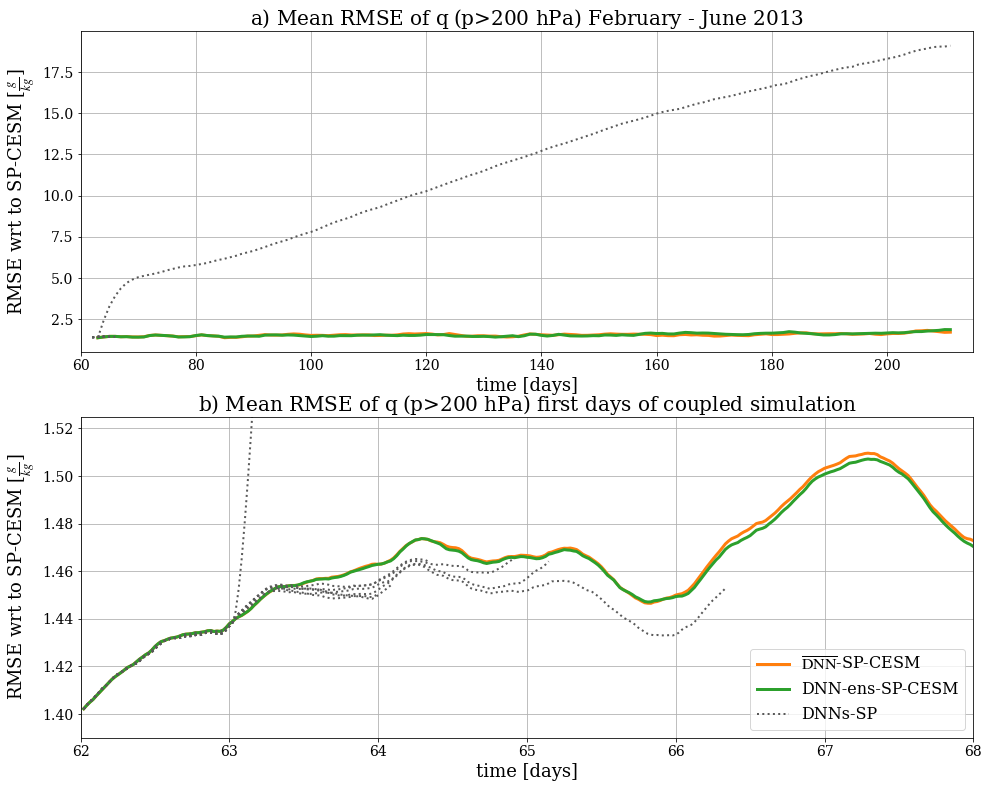

In [52]:
#plot averages of ANNs for specific humidity 

plt.figure(1,(16,13))
plt.subplot(2,1,1)
plt.title(r'a) Mean RMSE of q$~$(p>200 hPa) February - June 2013',fontsize=20)
plt.plot(DS2[0]['time'],SPCESM_ANN_CESM_Q_RSME_field_lat_lon_mean_below_200,color='#ff7f0e',linewidth=3)
plt.plot(DS2[0]['time'],SPCESM_ANN_ens_CESM_Q_RSME_field_lat_lon_mean_below_200,color='#2ca02c',linewidth=3)
plt.plot(DS2[0]['time'],SPCESM_ANN_6_lin_boost_CESM_Q_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_1[0]['time'],SPCESM_ANN_1_CESM_Q_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_2[0]['time'],SPCESM_ANN_2_CESM_Q_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_3[0]['time'],SPCESM_ANN_3_CESM_Q_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_4[0]['time'],SPCESM_ANN_4_CESM_Q_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_5[0]['time'],SPCESM_ANN_5_CESM_Q_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_7[0]['time'],SPCESM_ANN_7_CESM_Q_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.ylabel(r'RMSE wrt to SP-CESM [$\frac{g}{kg}$]',fontsize=18)
plt.xlabel('time [days]',fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlim(60,215)
plt.grid(True)

plt.subplot(2,1,2)

plt.title(r'b) Mean RMSE of q$~$(p>200 hPa) first days of coupled simulation',fontsize=20)

plt.plot(DS2_short[0]['time'],SPCESM_ANN_CESM_first_days_Q_RSME_field_lat_lon_mean_below_200,color='#ff7f0e',linewidth=3,
         label=r'$\overline{\mathrm{DNN}}$-SP-CESM')
plt.plot(DS2_short[0]['time'],SPCESM_ANN_ens_CESM_first_days_Q_RSME_field_lat_lon_mean_below_200,color='#2ca02c',linewidth=3,
        label=r'DNN-ens-SP-CESM')
plt.plot(ANN_1[0]['time'],SPCESM_ANN_1_CESM_Q_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2,label='DNNs-SP')
plt.plot(ANN_2[0]['time'],SPCESM_ANN_2_CESM_Q_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_3[0]['time'],SPCESM_ANN_3_CESM_Q_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_4[0]['time'],SPCESM_ANN_4_CESM_Q_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_5[0]['time'],SPCESM_ANN_5_CESM_Q_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(DS2_short[0]['time'],SPCESM_ANN_6_lin_CESM_first_days_Q_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.plot(ANN_7[0]['time'],SPCESM_ANN_7_CESM_Q_RSME_field_lat_lon_mean_below_200,color=[0.35,0.35,0.35],linestyle=':',linewidth=2)
plt.ylim(1.39,1.525)
#plt.yscale('log')
plt.ylabel(r'RMSE wrt to SP-CESM [$\frac{g}{kg}$]',fontsize=18)
plt.xlabel('time [days]',fontsize=18)
plt.legend(fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.grid(True)

plt.xlim(62,68)